In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
segment_id = 864691135567721964

# Load the appropriate volume data inferface object

In [57]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135567721964_synapses.csv'

In [7]:
from python_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691135567721964,864691131808917685,126350506,postsyn,159015,163866,21373,4248
1,864691135567721964,864691131817266592,133926944,postsyn,162210,185292,22676,3708
2,864691135567721964,864691132002312394,133375145,postsyn,161962,212462,22829,7716
3,864691135567721964,864691132049643177,73532781,postsyn,128892,207884,23301,11496
4,864691135567721964,864691132146704984,167829877,postsyn,180030,206188,22035,5436
...,...,...,...,...,...,...,...,...
6348,864691135567721964,864691137197144897,82142719,presyn,121331,188683,24233,1504
6349,864691135567721964,864691137197151297,104203877,presyn,142890,172428,24107,4528
6350,864691135567721964,864691137197151297,104205943,presyn,144197,172298,24104,4228
6351,864691135567721964,864691137197153345,147748365,postsyn,170630,207400,22377,7020


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(451453, 3), faces.shape=(899885, 3))>

In [10]:
from python_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 2060 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_31422.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_31422_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/decimation_meshlab_25806759.mls


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 2267 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_51338.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_51338_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_995491.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_51338.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_51338_remove_interior.off
/neurd_packages/NEURD/Applicati

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.846587]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5407 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_250363.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_250363_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_168860.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_250363.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_250363_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_168860.mls is being deleted....
Inside sp

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(278, 3), faces.shape=(550, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(234, 3), faces.shape=(462, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2045, 3), faces.shape=(4086, 3))>
xvfb-run -n 6580 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25852429.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(512, 3), faces.shape=(1020

  0%|          | 0/4 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(244, 3), faces.shape=(481, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(1777, 3), faces.shape=(3550, 3))>
xvfb-run -n 6195 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25852429.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(886, 

  0%|          | 0/6 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(248, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(1773, 3), faces.shape=(3542, 3))>
xvfb-run -n 2723 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/12345/decimation_meshlab_25852429.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(444, 3), faces.shape=(884, 

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.587199]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_578882.mls is being deleted....
Inside sphere validater: ratio_val = 108.49296057185164
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(356, 3), faces.shape=(706, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/466_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 178.06050539016724
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 1006 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_76191.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_76191_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/fill_holes_785518.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_76191.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_76191_fill_holes.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp

  0%|          | 0/12 [00:00<?, ?it/s]

Largest hole before segmentation = 60920.9840611568, after = 330805.80253342,

ratio = 5.430079760388205, difference = 269884.81847226317
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Not need to do a second pass because already found a soma


In [19]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 1


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [21]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':178.06049609184265,
    'soma_sdfs':array([0.846587]),
  },
}



# Step 2b: Saving off pipeline products

In [22]:
from python_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/products_up_to_soma_stage.pkl
File size is 16.487588 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140112215327456
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140111932452624


# Step 3: Decomposition

In [23]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>]
soma_mesh_list_centers = [array([607290.85387328, 771034.57102043, 909995.31979156])]
Getting Glia and Nuclei Pieces Subtracted Away 0.3467085361480713
 Splitting mesh after soma cancellation 1.1400327682495117
# of split_meshes = 4
 Containing Mesh Indices 0.04055166244506836
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.4066696166992188e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.5961503982543945
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

-

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/166759 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.82s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.57601022720337
branches_touching_root = [7]
combining close nodes
combine_threshold = 700
length of Graph = 36933
After combining close endpoints max(kept_branches_idx) = 136, len(kept_branches_idx) = 134
empty_indices % = 0.0
 conflict_indices % = 0.009613302211420458


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Decomposing first pass: 20.272559642791748
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [148]
mesh_large_connectivity: 0.00028324127197265625
Finding MAP candidates connected components: 0.00014209747314453125
Divinding into MP and MAP pieces: 5.7220458984375e-06
Total time for MAP sublimb processing 5.245208740234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.552436828613281e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.03263092041015625
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [606963.3196656  761263.13124606 911832.19073545]
current_skeleton.shape = (318, 2, 3)
node_for_stitch = 318: [606963.3196656  761263.13124606 911832.19073545]
node_for_stitch AFTER = 318: [606963.3196656  761263.13124606 9118

  0%|          | 0/134 [00:00<?, ?it/s]

332471 332472
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610836.9 779075.4 906316.1]
Time for preparing soma vertices and root: 0.0002410411834716797
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/71107 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.202303171157837
connecting at the root
branches_touching_root = [12]
combining close nodes
combine_threshold = 700
length of Graph = 8858
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.0034268549791638754


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Decomposing first pass: 7.260648250579834
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6894, 5364, 1966, 9749, 5267]
mesh_large_connectivity: 0.0266265869140625
Finding MAP candidates connected components: 0.00012731552124023438
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.9769690036773682
Grouping MP Sublimbs by Graph: 0.07267570495605469
Divinding into MP and MAP pieces: 7.152557373046875e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01542520523071289
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8518 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.05506730079650879
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.550631284713745
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1915600299835205
sbv[0].reshape(-1,3) = [[610836.9 779075.4 906316.1]]
closest_sk_pt_coord BEFORE = [609942. 779364. 906996.]
current_skeleton.shape = (1058, 2, 3)
node_for_stitch = 144: [609942. 779364. 906996.]
node_for_stitch AFTER = 144: [609942. 779364. 906996.]
possible_node_loc = [   0  181  514  592  630  640  834 1020 1058]
possible_node_loc AFTER = [   0  181  514  592  630  640  834 1020 1058]
curr_shortest_path = [144, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 166.0, 169.0, 174.0, 176.0, 178.0, 180.0, 181]
Current stitch point was not a branch or endpoint, shortest_path_length

  0%|          | 0/6 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1033, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 19.696906805038452
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7961 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_33715.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_33715_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_661080.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_33715.off
removed temporary out

0it [00:00, ?it/s]

Total time for decomposition = 5.300341367721558
mesh_correspondence_first_pass: 5.3003692626953125
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1033, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1033, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.049623803009575924
 conflict_indices % = 0.016415868673050615


  0%|          | 0/39 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 26.266141414642334
correspondence_1_to_1: 1.2533884048461914
Total time for MAP sublimb processing 26.266210079193115
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.018203258514404297
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02686786651611328
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0279080867767334
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.03075695037841797
Do Not Need to Fix MP Decomposition 3 so just continuing
Successful mesh connectivity with type

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08884374611334522
 conflict_indices % = 0.006073545872890842


  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [636853.01257571 785085.62792771 883118.75733574]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.026984908136482938
 conflict_indices % = 0.007135826771653544


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07013690949021074
 conflict_indices % = 0.005583851221905518


  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [601813.99441567 798147.85467095 910184.83951148]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04941014248506205
 conflict_indices % = 0.011797150298759001


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [613686.55938768 782177.87252093 905912.75140531]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.051210428305400374
 conflict_indices % = 0.01831160769708256


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09109361849596515
 conflict_indices % = 0.013911579781177286


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 68.32953453063965
Number of matching vertices = 52
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

141820 141821
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [607542.6 762831.9 914440.2]
Time for preparing soma vertices and root: 0.000308990478515625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62628 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8775162696838379
connecting at the root
branches_touching_root = [10]
combining close nodes
combine_threshold = 700
length of Graph = 7808
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.003281260003841475


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 6.010213851928711
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4233, 2486, 12101, 20208, 18383]
mesh_large_connectivity: 0.05780744552612305
Finding MAP candidates connected components: 0.00011849403381347656
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.1610252857208252
Grouping MP Sublimbs by Graph: 0.04651808738708496
Divinding into MP and MAP pieces: 3.814697265625e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.015223026275634766
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6927 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packag

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.09002256393432617
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 35.7276885509491
Checking connected components after removing cycles
Total time for mesh KDTree = 0.28045129776000977
sbv[0].reshape(-1,3) = [[607542.6 762831.9 914440.2]]
closest_sk_pt_coord BEFORE = [608074. 762561. 915167.]
current_skeleton.shape = (2649, 2, 3)
node_for_stitch = 938: [608074. 762561. 915167.]
node_for_stitch AFTER = 938: [608074. 762561. 915167.]
possible_node_loc = [  71  124  126  189  336  506  532  578  597  938 1277 1329 1421 1657
 1757 1840 1871 2289 2464 2498 2507 2537 2598 2649]
possible_node_loc AFTER = [  71  124  126  189  336  506  532  578  597  938 1277 1329 1421 1657
 1757 1840 1871 2289 2464 2498 2507 2537 2598 2649]
curr_shortest_path = [938]
Current stitch point was a branch or endpoint
change_status for create soma extending 

  0%|          | 0/20 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2509, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 43.22675180435181
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7886 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_62960.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_62960_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_649869.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_62960.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 12.761876344680786
mesh_correspondence_first_pass: 12.761937856674194
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (2509, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2509, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.05875180714497222
 conflict_indices % = 0.021685739666614412


  0%|          | 0/74 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 60.93448305130005
correspondence_1_to_1: 4.930742025375366
Total time for MAP sublimb processing 60.93478560447693
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.05225086212158203
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.024622678756713867
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.038831233978271484
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [638960.43191541 756081.88315311 949436.48435953]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_wit

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0717066218544596
 conflict_indices % = 0.006466571653442811


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [613101.64672925 779430.00572369 978255.72967205]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07343492586490939
 conflict_indices % = 0.007125205930807249


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [619621.55666018 680458.4761976  936121.64033632]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09022297141981457
 conflict_indices % = 0.0065895333690904915


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 89.41340851783752
Number of matching vertices = 27
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/15 [00:00<?, ?it/s]

124951 124952
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [612977.6 770342.8 904385.2]
Time for preparing soma vertices and root: 0.00039649009704589844
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50407 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.9750654697418213
connecting at the root
branches_touching_root = [18]
combining close nodes
combine_threshold = 700
length of Graph = 7941
After combining close endpoints max(kept_branches_idx) = 18, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.0052689134108758326


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Decomposing first pass: 6.156231880187988
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13210, 380, 1472, 1121, 9465, 6172]
mesh_large_connectivity: 0.0392153263092041
Finding MAP candidates connected components: 0.00010347366333007812
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.19164013862609863
Grouping MP Sublimbs by Graph: 0.04801678657531738
Divinding into MP and MAP pieces: 5.7220458984375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.011925935745239258
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6949 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_pa

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.06710338592529297
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 24.797942876815796
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1804063320159912
sbv[0].reshape(-1,3) = [[612977.6 770342.8 904385.2]]
closest_sk_pt_coord BEFORE = [612910. 769955. 903933.]
current_skeleton.shape = (1330, 2, 3)
node_for_stitch = 0: [612910. 769955. 903933.]
node_for_stitch AFTER = 0: [612910. 769955. 903933.]
possible_node_loc = [   0   36  107  346  417  441  712 1067 1084 1124 1152 1235 1259 1330]
possible_node_loc AFTER = [   0   36  107  346  417  441  712 1067 1084 1124 1152 1235 1259 1330]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [612910. 769955. 903933.]
skipping soma 0 because closest skelet

  0%|          | 0/9 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1290, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 26.313519716262817
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7490 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_86728.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_86728_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_147670.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_86728.off
removed temporary out

0it [00:00, ?it/s]

Total time for decomposition = 7.443864107131958
mesh_correspondence_first_pass: 7.443933963775635
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (1290, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1290, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.04984286612193589
 conflict_indices % = 0.027247014456316783


  0%|          | 0/37 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 36.1413369178772
correspondence_1_to_1: 2.3719115257263184
Total time for MAP sublimb processing 36.141398906707764
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005120277404785156
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.021636009216308594
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [627667.0685465  752448.21024514 890230.26052172]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.055343904448105434
 conflict_indices % = 0.009524299835255354


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [4]
conn = [4]
winning_vertex = [629663.72297337 762149.95797074 895035.22026077]
MP_branches_with_stitch_point = [4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07659841954022989
 conflict_indices % = 0.003232758620689655


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07105030891438659
 conflict_indices % = 0.01699029126213592


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [4]
MP_branches_for_correspondence = [4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 51.517035722732544
Number of matching vertices = 28
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/21 [00:00<?, ?it/s]

100589 100590
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [600586.1 766173.1 909408.5]
Time for preparing soma vertices and root: 0.00023627281188964844
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/37990 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.3808691501617432
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5157
After combining close endpoints max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.005621387664616928


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Decomposing first pass: 5.775834321975708
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2984, 1370, 4758]
mesh_large_connectivity: 0.004669189453125
Finding MAP candidates connected components: 8.96453857421875e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.13611841201782227
Grouping MP Sublimbs by Graph: 0.04489469528198242
Divinding into MP and MAP pieces: 4.76837158203125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013155937194824219
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7397 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applica

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.019491910934448242
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.3179190158844
Checking connected components after removing cycles
Total time for mesh KDTree = 0.09370636940002441
sbv[0].reshape(-1,3) = [[600586.1 766173.1 909408.5]]
closest_sk_pt_coord BEFORE = [600201. 766323. 909664.]
current_skeleton.shape = (352, 2, 3)
node_for_stitch = 352: [600201. 766323. 909664.]
node_for_stitch AFTER = 352: [600201. 766323. 909664.]
possible_node_loc = [  0 352]
possible_node_loc AFTER = [  0 352]
curr_shortest_path = [352]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [600201. 766323. 909664.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[600201., 766323., 909664.]])}
    Total time for Fixing 

0it [00:00, ?it/s]

Total time for decomposition = 1.7196753025054932
mesh_correspondence_first_pass: 1.7197108268737793
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (352, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (352, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.027326602282704126
 conflict_indices % = 0.0


  0%|          | 0/15 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.040797710418701
correspondence_1_to_1: 1.5182774066925049
Total time for MAP sublimb processing 14.040871858596802
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01658344268798828
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023654460906982422
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.024057626724243164
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [2]
conn = [2]
winning_vertex = [588932.63554664 766332.0624331  905632.93879231]
MP_branches_with_stitch_point = [2]
MAP_branches_with_stit

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03928884986830553
 conflict_indices % = 0.000877963125548727


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06495983935742972
 conflict_indices % = 0.0008032128514056225


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [2]
MP_branches_for_correspondence = [2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [585324.42156918 761913.547466   900224.52736136]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.052442078897933626
 conflict_indices % = 0.004383218534752661


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06603711718801233
 conflict_indices % = 0.010951537805757755


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [575389.03340603 737674.04893041 895030.74819376]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0701641038893914
 conflict_indices % = 0.00930352758754361


  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 32.81501626968384
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

75781 75782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [610476.4 763192.8 908818.7]
Time for preparing soma vertices and root: 0.00030922889709472656
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27114 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7815477848052979
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 3511
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.003035182203468251


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 3.5301456451416016
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [979, 2838]
mesh_large_connectivity: 0.0014431476593017578
Finding MAP candidates connected components: 6.890296936035156e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.13518857955932617
Grouping MP Sublimbs by Graph: 0.03720402717590332
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013394832611083984
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2818 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applic

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.013561010360717773
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.510755062103271
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11207723617553711
sbv[0].reshape(-1,3) = [[610476.4 763192.8 908818.7]]
closest_sk_pt_coord BEFORE = [610922. 763015. 909075.]
current_skeleton.shape = (135, 2, 3)
node_for_stitch = 0: [610922. 763015. 909075.]
node_for_stitch AFTER = 0: [610922. 763015. 909075.]
possible_node_loc = [  0 135]
possible_node_loc AFTER = [  0 135]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [610922. 763015. 909075.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[610922., 763015., 909075.]])}
    Total time for Fixing Skel

0it [00:00, ?it/s]

Total time for decomposition = 1.6328229904174805
mesh_correspondence_first_pass: 1.632850170135498
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (135, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (135, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.023316740895991617
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.732905149459839
correspondence_1_to_1: 0.19133853912353516
Total time for MAP sublimb processing 13.732969999313354
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01686549186706543
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02347278594970703
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [625541.26641918 751740.4911113  912025.85771601]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08088679355555123
 conflict_indices % = 0.005298942159708558


  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [620994.00848407 753206.95466875 910936.33342788]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.0554002541296061
 conflict_indices % = 0.011181702668360865


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05921350007533524
 conflict_indices % = 0.014916377881573


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 31.602529525756836
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

54032 54033
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [602191.8 777465.4 910208.8]
Time for preparing soma vertices and root: 0.00027942657470703125
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14121 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 12.93it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3420066833496094
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1591
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.240623950958252
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28180]
mesh_large_connectivity: 0.00015306472778320312
Finding MAP candidates connected components: 8.535385131835938e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.010606765747070312
Grouping MP Sublimbs by Graph: 2.8848648071289062e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.020264625549316406
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3930 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/None_poisson.off -s /neurd_packages/NEURD/Applica

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.036511898040771484
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.51944613456726
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1773827075958252
sbv[0].reshape(-1,3) = [[602191.8 777465.4 910208.8]]
closest_sk_pt_coord BEFORE = [601796. 777520. 910061.]
current_skeleton.shape = (1306, 2, 3)
node_for_stitch = 1306: [601796. 777520. 910061.]
node_for_stitch AFTER = 1306: [601796. 777520. 910061.]
possible_node_loc = [   2   75  138  168  173  253  286  312  372  408  447  504  588  637
  751  973 1130 1306]
possible_node_loc AFTER = [   2   75  138  168  173  253  286  312  372  408  447  504  588  637
  751  973 1130 1306]
curr_shortest_path = [1306]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [601796. 7775

  0%|          | 0/16 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1199, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 21.74873971939087
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9169 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55235.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55235_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/remove_interior_50519.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/temp/neuron_55235.off
removed temporary outpu

0it [00:00, ?it/s]

Total time for decomposition = 4.325212001800537
mesh_correspondence_first_pass: 4.325269937515259
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1199, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1199, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.054506742370475515
 conflict_indices % = 0.0


  0%|          | 0/31 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 28.37586545944214
correspondence_1_to_1: 2.2815427780151367
Total time for MAP sublimb processing 28.3759286403656
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 30.004998207092285
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

28179 28180
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 393.8260405063629


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(400, 3), faces.shape=(796, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 3.814697265625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 107.64it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02901315689086914
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 126
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [137.60386347]
width_median= 137.60386346885278
segment_widths_median = [137.60386347]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 70.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08603906631469727
branches_touching_root = [1]
combining close nodes
combine_threshold = 1300
length of Graph = 168
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.03391959798994975


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [141.07389195 136.46415139 214.38133518]
width_median= 148.40517866948917
segment_widths_median = [141.07389195 136.46415139 214.38133518]
Using the axon parameters
Decomposing first pass: 0.08536267280578613
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9087066650390625e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2411346435546875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.20773911476135254
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

795 796
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.45737600326538086
Floating 1: <trimesh.Trimesh(vertices.shape=(63, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.5299530029296875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 101.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.022552013397216797
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.68191227]
width_median= 151.6819122747669
segment_widths_median = [151.68191227]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 75.58it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06275653839111328
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [151.66198682]
width_median= 151.66198682195264
segment_widths_median = [151.66198682]
Using the axon parameters
Decomposing first pass: 0.041849374771118164
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.2901763916015625e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.384185791015625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.129364013671875
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

119 120
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.22516536712646484
Floating 2: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(115, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.5299530029296875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 79.07it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.025842905044555664
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [316.6773474]
width_median= 316.6773474030568
segment_widths_median = [316.6773474]
Decomposing first pass: 0.040082454681396484
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3126602172851562e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8358230590820312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06707048416137695


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11629366874694824


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04740968711072031
 conflict_indices % = 0.003224151828240639


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 4
Total time for stitching floating pieces = 10.743056058883667
Total time for Concept Networks = 11.352558612823486
Total time for all mesh and skeletonization decomp = 415.92268657684326
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 741 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_633901.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_633901_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/poisson_900958.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_temp/neuron_633901.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/Poisson_

    current_width= 89.85200252485915
Working on limb L0 branch 39
    current_width= 119.81117791929438
Working on limb L0 branch 40
    current_width= 174.34685615552092
Working on limb L0 branch 63
    current_width= 161.28612609903655
Working on limb L0 branch 75
    current_width= 173.9711281629101
Working on limb L0 branch 100
    current_width= 184.79948710093103
Working on limb L0 branch 104
    current_width= 164.92740753027098
Working on limb L0 branch 111
    current_width= 102.48073827274362
Working on limb L0 branch 115
    current_width= 104.13639206365286
Working on limb L0 branch 45
    current_width= 122.99875188727947
Working on limb L0 branch 48
    current_width= 88.27545353735994
Working on limb L0 branch 134
    current_width= 174.2265383924398
Working on limb L0 branch 18
    current_width= 107.42407306696485
Working on limb L0 branch 22
    current_width= 321.5230829802523
Working on limb L0 branch 56
    current_width= 99.71109301223365
Working on limb L0 branch

    current_width= 226.18198580360735
Working on limb L4 branch 6
    current_width= 192.22606103868372
Working on limb L4 branch 1
    current_width= 244.643146441905
Working on limb L4 branch 5
    current_width= 294.1255257055235
Working on limb L5 branch 0
    current_width= 343.2818640660555
Working on limb L5 branch 1
    current_width= 140.3538223070222
Working on limb L5 branch 3
    current_width= 394.4135837912502
Working on limb L5 branch 2
    current_width= 300.5793449184472
Working on limb L5 branch 4
    current_width= 265.3420983511513
Working on limb L6 branch 0
    current_width= 304.1258282330323
ially_centered_speed_tradeoff AFTER = 0.2
medial centered AFTER 1
AREA VARIATION AFTER 0.0001
MAX ITERATIONS AFTER 500
medial centered END 1
set_medially_centered_speed_tradeoff END = 0.2
quality_speed_tradeoff END = 0.2
Max iterations END = 500
AREA VARIATION END 0.0001
Number of vertices of the skeleton: 1317
Number of edges of the skeleton: 1318

Number of segments: 104



  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 42



  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 60



  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 72



  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 90



  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 51



  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 145



  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 93



  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 118



  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 116



  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 41



  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 192



  0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/192 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 47



  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 110



  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 137



  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 66



  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 129



  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 127



  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 43



  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 96



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 151



  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 123



  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 72



  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 44



  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 106



  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 171



  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 111



  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 142



  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 122
    No spines and using precomputed width: 268.3987974668497
Working on limb L0 branch 105
    current_width= 254.40528708461596
Working on limb L0 branch 123
    No spines and using precomputed width: 175.92980853069895
Working on limb L0 branch 92
    No spines and using precomputed width: 162.59099336271294
Working on limb L0 branch 106
    No spines and using precomputed width: 177.75531525200904
Working on limb L0 branch 91
    No spines and using precomputed width: 269.53065909629095
Working on limb L0 branch 93
    No spines and using precomputed width: 143.67443926531143
Working on limb L0 branch 78
    No spines and using precomputed width: 173.39493447310736
Working on limb L0 branch 82
    current_width= 189.9313802

    current_width= 177.7286317599182
Working on limb L0 branch 121
    current_width= 177.11512455029217
Working on limb L0 branch 98
    No spines and using precomputed width: 113.04884069060992
Working on limb L0 branch 108
    No spines and using precomputed width: 83.12380816646467
Working on limb L0 branch 112
    No spines and using precomputed width: 85.71487557132254
Working on limb L0 branch 114
    No spines and using precomputed width: 99.9978330061532
Working on limb L0 branch 127
    No spines and using precomputed width: 90.68990103293501
Working on limb L0 branch 35
    No spines and using precomputed width: 73.84748718680041
Working on limb L0 branch 38
    No spines and using precomputed width: 112.47202255089317
Working on limb L0 branch 14
    current_width= 232.20032438829074
Working on limb L0 branch 23
    No spines and using precomputed width: 105.47517414833388
Working on limb L0 branch 124
    No spines and using precomputed width: 96.2188902975276
Working on l

    current_width= 280.07182547384673
Working on limb L4 branch 7
    No spines and using precomputed width: 175.86060412561818
Working on limb L4 branch 2
    current_width= 263.16899449126436
Working on limb L4 branch 4
    current_width= 311.3052812401028
Working on limb L4 branch 3
    current_width= 226.18198580360735
Working on limb L4 branch 6
    No spines and using precomputed width: 192.22606103868372
Working on limb L4 branch 1
    current_width= 242.99401936608882
Working on limb L4 branch 5
    current_width= 274.3811050502981
Working on limb L5 branch 0
    No spines and using precomputed width: 343.2818640660555
Working on limb L5 branch 1
    No spines and using precomputed width: 140.3538223070222
Working on limb L5 branch 3
    No spines and using precomputed width: 394.4135837912502
Working on limb L5 branch 2
    current_width= 281.2288499004053
Working on limb L5 branch 4
    current_width= 262.83065112995826
Working on limb L6 branch 0
    current_width= 300.23557

In [24]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [25]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [26]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':178.06049609184265,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Saving off neuron

In [27]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.27452802658081055
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 1.0196559429168701
Total time for limb_meshes compression = 1.9023752212524414
    Starting Limb Correspondence Compression


  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 29.88142967224121
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140112215327456
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140111932452624
Total time for compression = 65.1831443309784


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964---
saved neuron filepath = 864691135567721964


'864691135567721964.pbz2'

# Reloading the Neuron

In [28]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [29]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':178.06049609184265,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 4A: Multi Soma Split Suggestions

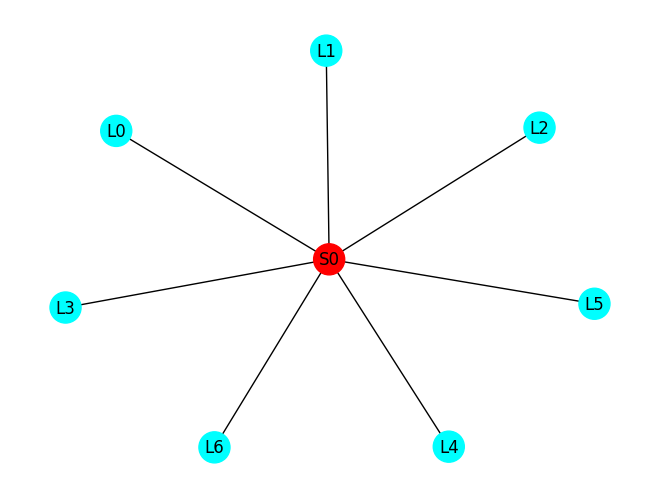

In [30]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [31]:
multi_soma_split_parameters = dict()

In [32]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [33]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [34]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [35]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135567721964,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>],
    'soma_run_time':178.06049609184265,
    'soma_sdfs':array([0.846587]),
  },
  'decomposition':
  {
    'bbox_volume':42.62630729073248,
    'bbox_x_max':793099.5764108214,
    'bbox_x_max_soma_relative':185808.72253754397,
    'bbox_x_min':451448.9156876523,
    'bbox_x_min_soma_relative':-155841.93818562513,
    'bbox_y_max':954550.6043850379,
    'bbox_y_max_soma_relative':183516.03336461133,
    'bbox_y_min':577251.9114422437,
    'bbox_y_min_soma_relative':-193782.65957818285,
    'bbox_z_max':1079285.864478381,
    'bbox_z_max_soma_relative':169290.54468681884,
    'bbox

# Step 5: Cell Typing

In [36]:
from neurd import neuron_pipeline_utils as npu

In [50]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segme


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 5


Number of segments: 5


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1

branches_without_postsyn_req query = 
skeletal_length > 10000  and ((synapse_density_offset_endpoint_upstream < 0.00015) or (n_synapses_offset_endpoint_upstream <= 2)) and (n_synapses_pre_offset_endpoint_upstream <= 1) and (width_new > 95) and (width_new < 650) and (n_synapses_spine_offset_endpoint_upstream < 3)
No limb branch to plot
Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_n

100%|██████████| 1/1 [00:10<00:00, 10.44s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 11.411894083023071
branches_touching_root = [15]
combining close nodes
combine_threshold = 1300
length of Graph = 47118
After combining close endpoints max(kept_branches_idx) = 490, len(kept_branches_idx) = 449
empty_indices % = 0.0
 conflict_indices % = 0.028083451415478307
Decomposing first pass: 55.22804093360901
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 9.298324584960938e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.6689300537109375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.003355741500854492
sbv[0].reshape(-1,3) = [[606217.5 761733.  911841. ]]
closest_sk_pt_coord BEFORE = [607085.45171222 761489.43217667 911789.29988978]
curre

100%|██████████| 1/1 [00:00<00:00, 496.90it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.011677026748657227
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.021380186080932617
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 8.821487426757812e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.5974044799804688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.03392291069030762
Removed 0 skeletal branches
119 120
For marked faces: None
empty_indices % = 0.0

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.08030819892883301
concept_network_dict = {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7f6c87f91760>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [607212.4 761727.8 911846.2]---------
Starting_edge inside branches_to_conept = [[606459.1 760534.7 912002.4]
 [607212.4 761727.8 911846.2]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [435]
printing out current edge:
[[607212.4 761727.8 911846.2]
 [606459.1 760534.7 912002.4]]
edge_endpoints_to_process was empty so exiting loop after 450 iterations
starting_node in concept map (that should match the starting edge) = 440
Total time for branches to concept conversion = 2.350499391555786

Done generating concept network 



Number of segments: 7


Number of segments: 7


Number of segments: 24


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 5


Number of segmen


Number of segments: 47


Number of segments: 71


Number of segments: 42


Number of segments: 42


Number of segments: 65


Number of segments: 24


Number of segments: 29


Number of segments: 16


Number of segments: 14


Number of segments: 13


Number of segments: 27


Number of segments: 13


Number of segments: 23


Number of segments: 47


Number of segments: 39


Number of segments: 86


Number of segments: 9


Number of segments: 7


Number of segments: 38


Number of segments: 32


Number of segments: 32


Number of segments: 21


Number of segments: 41


Number of segments: 31


Number of segments: 25


Number of segments: 31


Number of segments: 31


Number of segments: 24


Number of segments: 76


Number of segments: 61


Number of segments: 14


Number of segments: 24


Number of segments: 13


Number of segments: 16


Number of segments: 65


Number of segments: 35


Number of segments: 26


Number of segments: 50


Number of segments: 21


Number of segments: 31


N

In [46]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 1.4677747619640795
syn_density_head = 0.09582757010883777
syn_density_neck = 0.006641514760018459
syn_density_shaft = 1.3254565885351126
sk_length_synapse_density = 3161929.282521331
About to do spine_density stats
postsyn_limb_branch = {'L1': array([ 0,  1,  8, 10, 11, 12, 14]), 'L2': array([ 0,  4,  8,  9, 12, 13, 14]), 'L3': array([ 0, 11, 12]), 'L4': array([0, 1, 2, 5]), 'L5': array([2, 4]), 'L6': array([0])}
sk_length = 2600165.2106564883
# of spines = 265
Density = 0.10191660088133128
spine_density = 0.10191660088133128 (multiplier = 1000)
sk_length spine density = 2600165.2106564883
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = inhibitory, pred_class_label = inhibitory
Total time for e/i calculations = 0.18618249893188477
baylor_e_i = inhibitory

*****Using v7 INHIBITORY Filters!!!


Curre

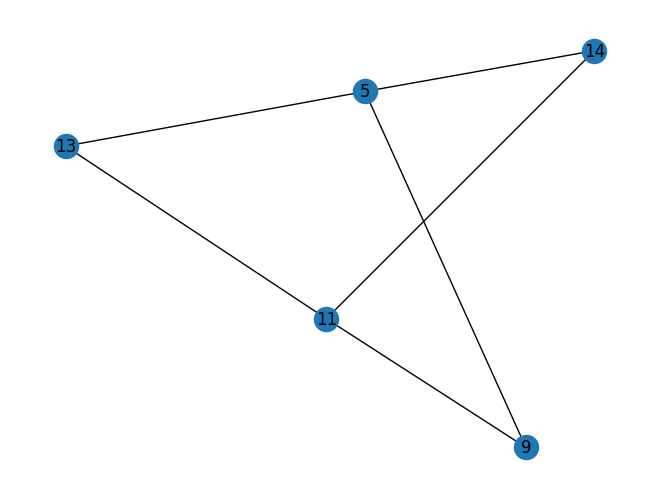

Performing global features query
Done with edge_df: 0.0008852481842041016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   20.113335               0.215856              0.000228   
1   9   5     62.37   31.052967               0.249959              0.000000   
2  11  13     27.84   13.995667               0.191548              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  13   5     19.26   65.161969               0.524517              0.000000   
5  14   5     48.78   47.438106               0.381850              0.000146   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                0                       None                          None  
2     

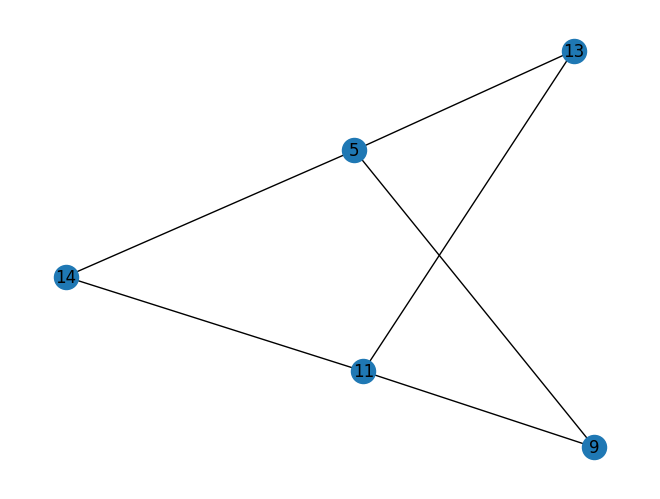

Performing node features query
Done with edge_df: 0.001001596450805664
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   9  11     49.54   20.113335               0.215856              0.000228   
1   9   5     62.37   31.052967               0.249959              0.000000   
2  11  13     27.84   13.995667               0.191548              0.000228   
3  11  14     56.20    3.728196               0.051025              0.000082   
4  13   5     19.26   65.161969               0.524517              0.000000   
5  14   5     48.78   47.438106               0.381850              0.000146   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                0                       None                          None   
2       

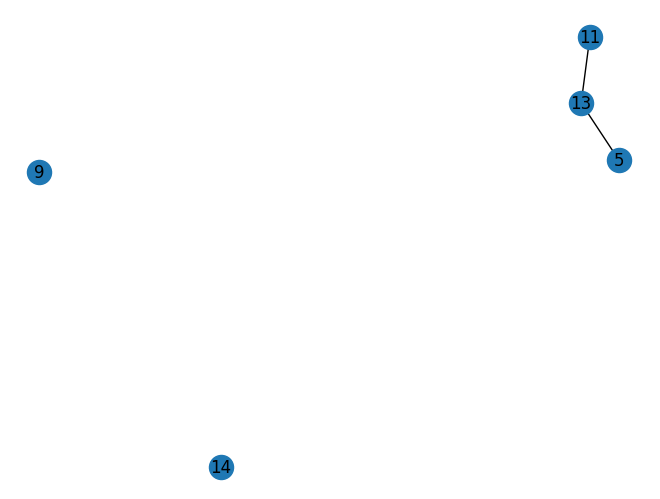

for upstream node 5, winning_node = None, error_branches = [ 9 11 13 14]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2291.053534137125 but max skip distance was 2291.053534137125
Current node skip distance was 1396.2155458975435 but max skip distance was 1396.2155458975435
Current node skip distance was 1554.913694903764 but max skip distance was 1554.913694903764
Current node skip distance was 1546.9734240260361 but max skip distance was 1546.9734240260361
Current node skip distance was 1471.108130620547 but max skip distance was 1711.904725943467
Current node skip distance was 1412.7928517625744 but max skip distance was 1412.7928517625744
Current node skip distance was 1486.6422825420861 but max skip distance was 1486.6422825420861
Current node skip distance was 1817.724537011968 but max skip distance was 2291.053534137125
Current node skip distance was 1501.0959360356467 but max skip distance was 1501.09593

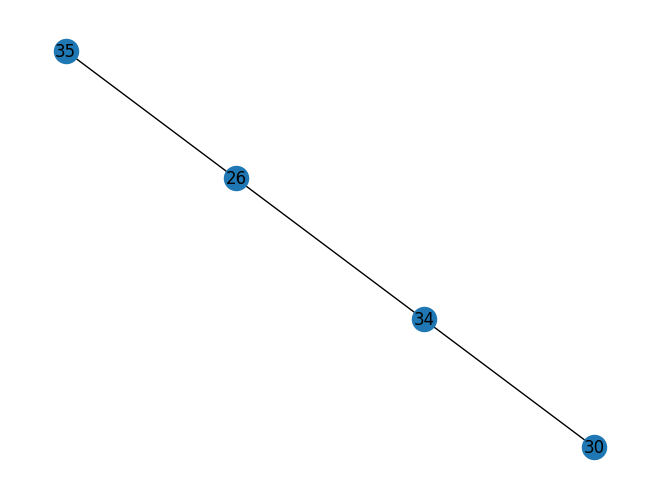

Performing global features query
Done with edge_df: 0.0008685588836669922
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  34     59.58   12.374288               0.150128              0.000283   
1  26  35     25.87   25.517763               0.236402              0.000099   
2  30  34     49.14    0.555215               0.005891              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       True                          None  
1                2                      False                          None  
2                3                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   25.517763               0.236402              

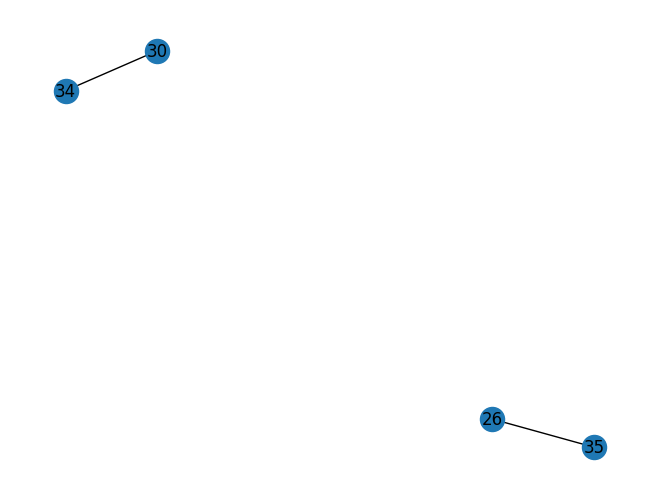

Performing node features query
Done with edge_df: 0.0005915164947509766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   25.517763               0.236402              0.000099   
1  30  34     49.14    0.555215               0.005891              0.000283   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                      False                          None   
1                3                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  26  35     25.87   25.517763               0.236402              0.000099   
1  30  34     49.14    0.555215               0.005891             

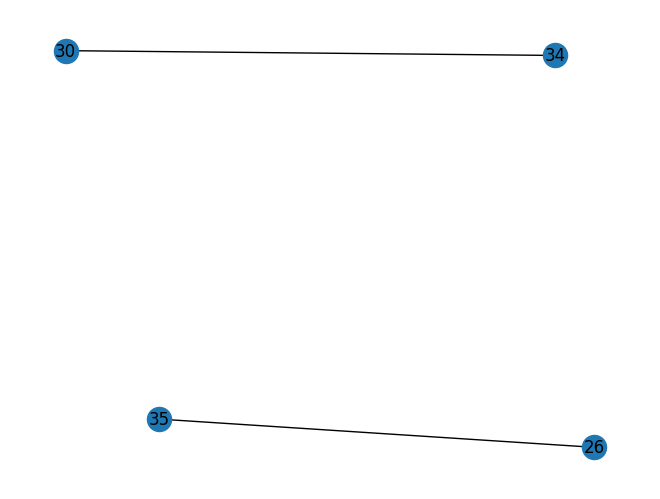

for upstream node 35, winning_node = 26, error_branches = [30 34]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (82.42468808628384) less than width_min(250)
Current node skip distance was 1677.9335264736949 but max skip distance was 1677.9335264736949
Current node skip distance was 1623.6893897676364 but max skip distance was 1687.839175191355
Current node skip distance was 1465.4945829272474 but max skip distance was 1465.4945829272474
Current node skip distance was 1455.9870844894756 but max skip distance was 1455.9870844894756
Current node skip distance was 1481.2995057656967 but max skip distance was 1900.0074043431523
Current node skip distance was 1819.9573759286577 but max skip distance was 1819.9573759286577
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010671615600585938
Performing Edge Query
After edge filter, # of r

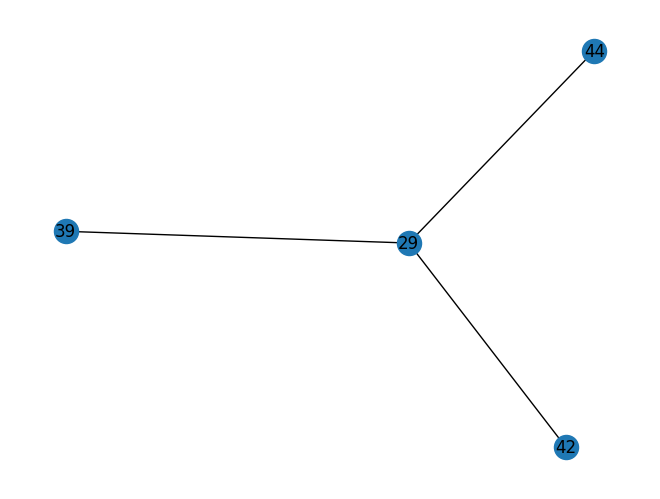

Performing global features query
Done with edge_df: 0.0017478466033935547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   40.023792               0.484079              0.000000   
1  29  42     38.61   13.243354               0.160176              0.000033   
2  29  44     33.11   74.109516               0.472668              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                       None                          None  
2                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   40.023792               0.484079              

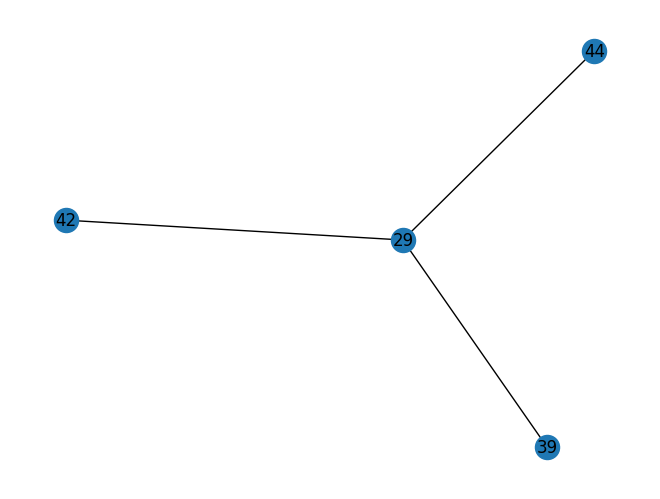

Performing node features query
Done with edge_df: 0.0009174346923828125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  29  39     14.17   40.023792               0.484079              0.000000   
1  29  42     38.61   13.243354               0.160176              0.000033   
2  29  44     33.11   74.109516               0.472668              0.000352   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                       None                          None   
2                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

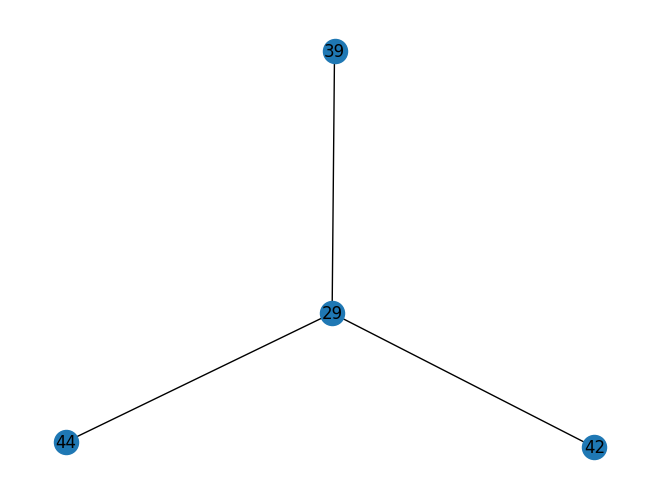

for upstream node 44, winning_node = None, error_branches = [29 39 42]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1407.2364002485333 but max skip distance was 1407.2364002485333
Current node skip distance was 1437.4230453052987 but max skip distance was 1437.4230453052987
Current node skip distance was 1697.3244725786685 but max skip distance was 1896.634515159709
Current node skip distance was 1533.0819962936434 but max skip distance was 1533.0819962936434
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1759.9527762328148 but max skip distance was 1759.9527762328148
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1983.9878891513208 but max skip distance was 2016.3691093054942
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1490.7851567970627 but max skip d

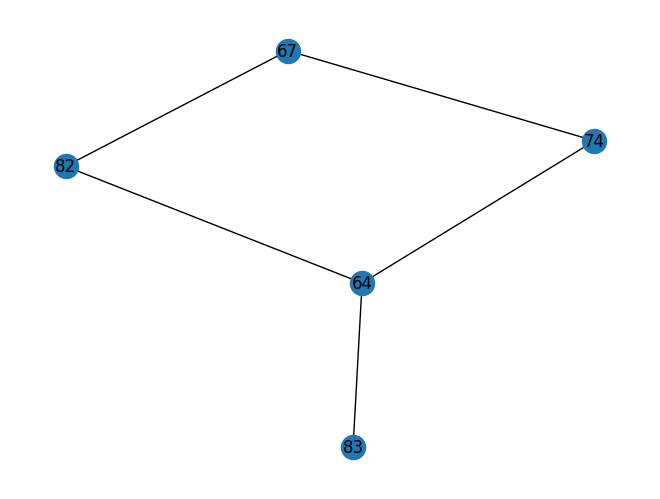

Performing global features query
Done with edge_df: 0.002139568328857422
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   18.289527               0.319367              0.000162   
1  64  83     32.69   17.752502               0.309989              0.000251   
2  64  74     36.69    6.557693               0.102744              0.000251   
3  67  82     25.44    1.771389               0.022907              0.000015   
4  67  74     26.27   13.503222               0.211564              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                4                       None                          None  
1                2                       None                          None  
2                2                       None                          None  
3        

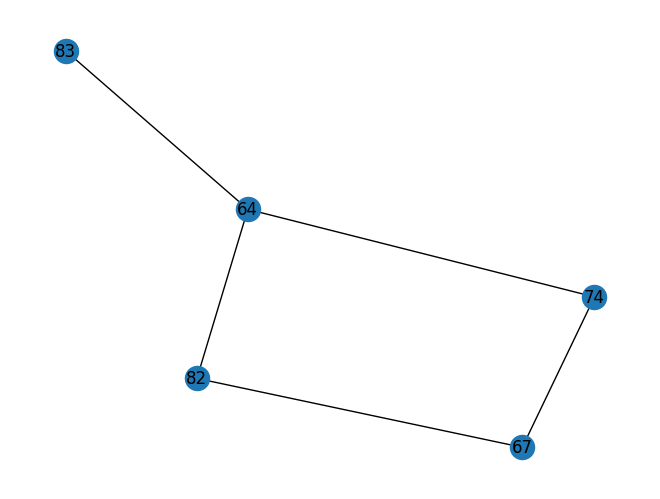

Performing node features query
Done with edge_df: 0.0008556842803955078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  64  82     27.25   18.289527               0.319367              0.000162   
1  64  83     32.69   17.752502               0.309989              0.000251   
2  64  74     36.69    6.557693               0.102744              0.000251   
3  67  82     25.44    1.771389               0.022907              0.000015   
4  67  74     26.27   13.503222               0.211564              0.000074   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                4                       None                          None   
1                2                       None                          None   
2                2                       None                          None   
3       

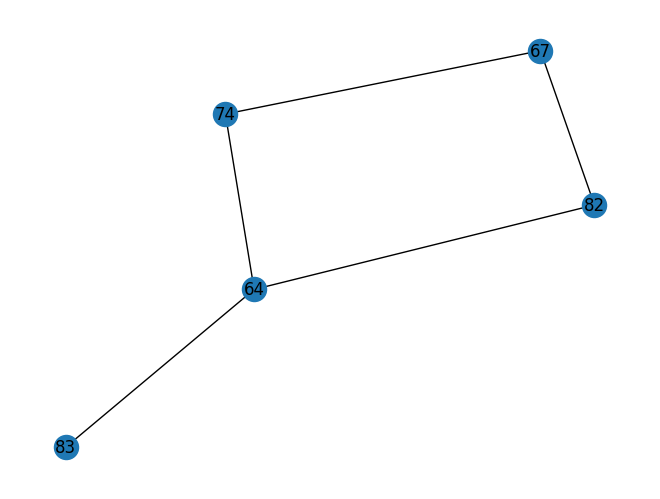

for upstream node 74, winning_node = None, error_branches = [64 67 82 83]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1657.5372812541762 but max skip distance was 1715.708392446817
Current node skip distance was 1477.6014975110577 but max skip distance was 1767.9115604550725
Current node skip distance was 1436.6213580418726 but max skip distance was 1519.4828706434616
Current node skip distance was 1897.165624856229 but max skip distance was 2300.0
Current node skip distance was 1965.5954489665883 but max skip distance was 1992.0082495699853
Current node skip distance was 1481.4901715666037 but max skip distance was 1481.4901715666037
Current node skip distance was 1438.0731940970968 but max skip distance was 1908.2285555703459
Current node skip distance was 2013.8579818850271 but max skip distance was 2217.116577405139
Current node skip distance was 1871.9052802376707 but max skip distance was 2300.0
Current n

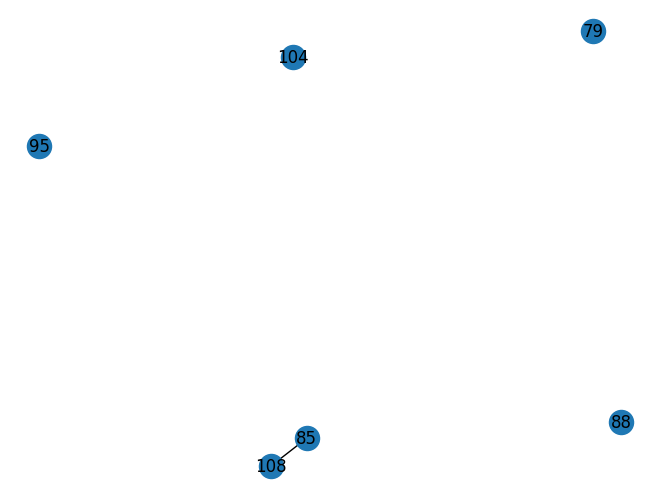

Performing global features query
Done with edge_df: 0.0006513595581054688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.824595               0.378138              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  
Afer Global query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.824595               0.378138              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                3                       None                          None  


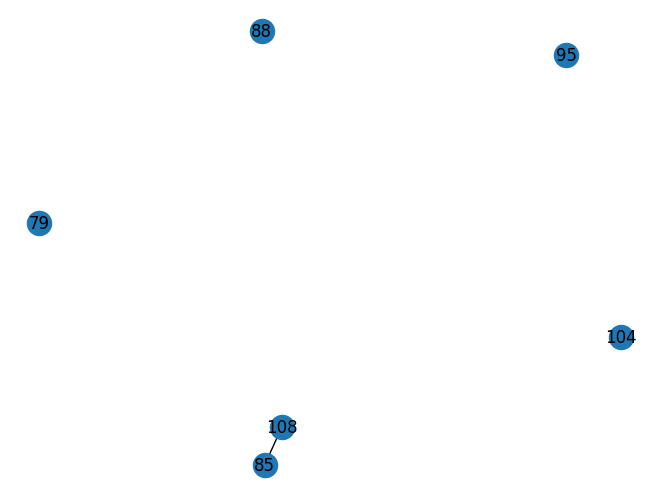

Performing node features query
Done with edge_df: 0.0006031990051269531
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.824595               0.378138              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                3                       None                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u    v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  85  108     55.32   57.824595               0.378138              0.000253   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                3                       None                          None   

  above_threshold_delete  
0                   None  


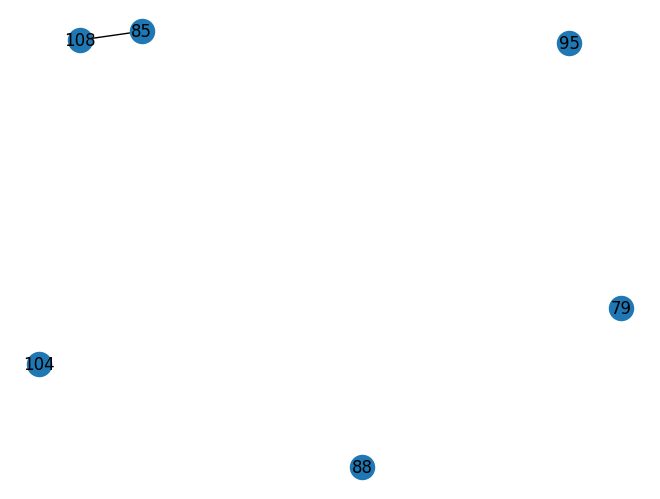

for upstream node 108, winning_node = 85, error_branches = [ 79  88  95 104]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1510.8185578822008 but max skip distance was 1510.8185578822008
Current node skip distance was 1458.786587331158 but max skip distance was 1458.786587331158
Current node skip distance was 1770.8640452267325 but max skip distance was 1803.8310592164503
Current node skip distance was 1853.2308079831187 but max skip distance was 2300.0
Current node skip distance was 1511.088544241397 but max skip distance was 1511.088544241397
Current node skip distance was 1412.265481557366 but max skip distance was 2039.9309575150019
Current node skip distance was 1960.9148168013344 but max skip distance was 1960.9148168013344
Current node skip distance was 2154.5586541444372 but max skip distance was 2154.5586541444372
Current node skip distance was 1612.8250657889005 but max skip distance was 1

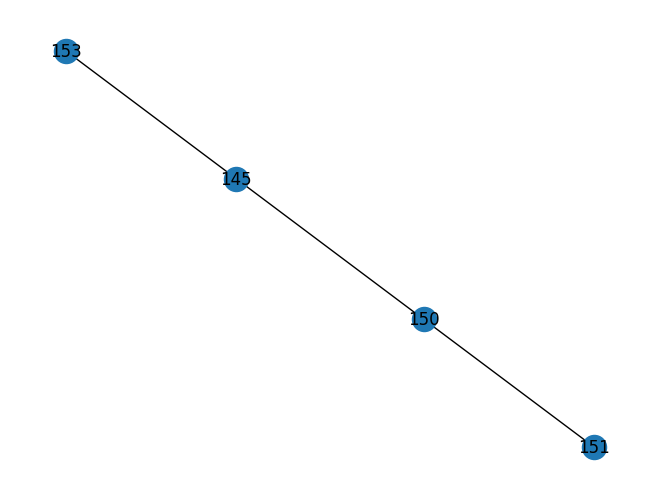

Performing global features query
Done with edge_df: 0.0008535385131835938
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   71.544660               0.853915   
1  145  153     26.01   36.660981               0.437564   
2  150  151     28.18   71.289084               0.848277   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000046                0                       True   
1              0.000035                2                      False   
2              0.000037                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

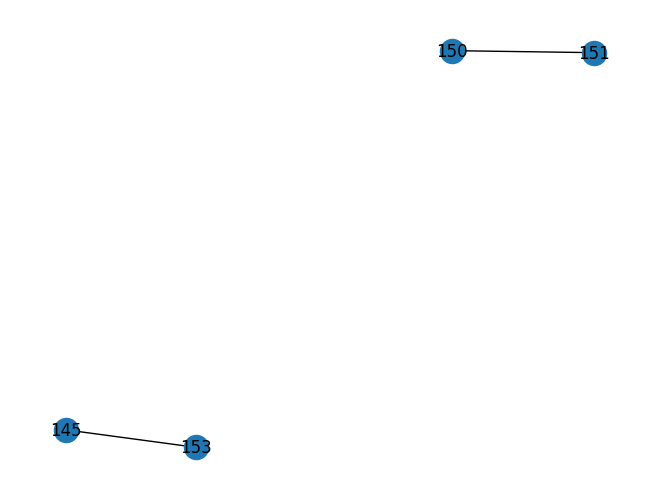

Performing node features query
Done with edge_df: 0.0007562637329101562
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   
1  150  151     28.18   71.289084               0.848277   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000035                2                      False   
1              0.000037                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   
1  150  151     28.18   71.289084               0.848277   

   synapse_density_diff  n_synapses_diff

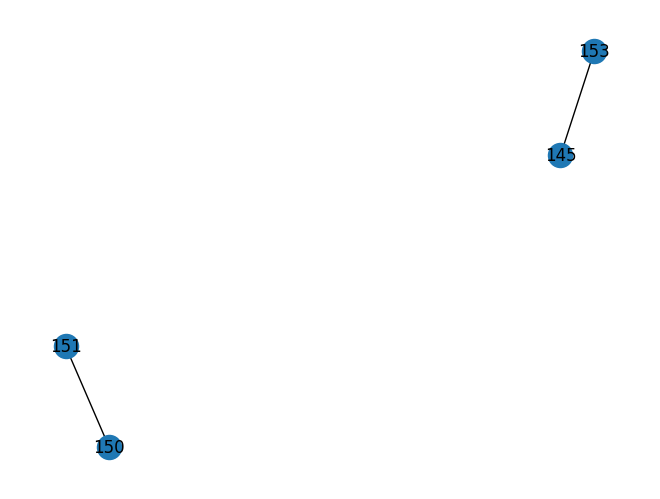

for upstream node 151, winning_node = 150, error_branches = [145 153]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (155.32898062672632) less than width_min(250)
Current node skip distance was 1476.7236141240276 but max skip distance was 1808.574664496758
Current node skip distance was 1668.5220917782256 but max skip distance was 1668.5220917782256
Current node skip distance was 1725.31485973995 but max skip distance was 2052.2462895062013
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007848739624023438
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   71.544660               0.853915   
1  145  153     26.01   36.660981               0.437564   
2  145  154    120.63    

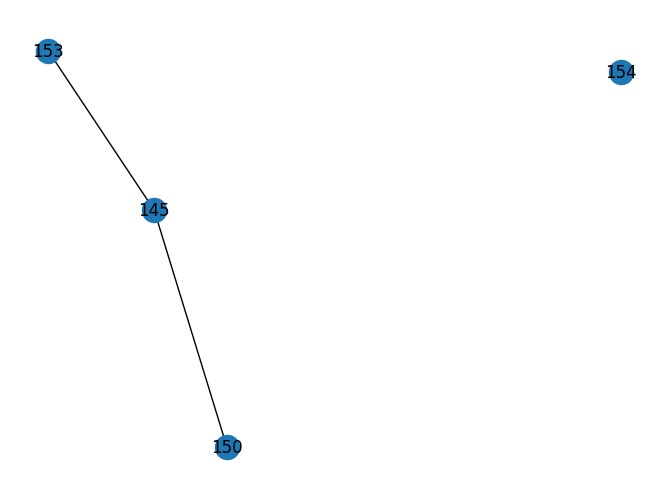

Performing global features query
Done with edge_df: 0.0008668899536132812
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  150     51.68   71.544660               0.853915   
1  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000046                0                        True   
1              0.000035                2                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000035                2                       False   

  definite_part

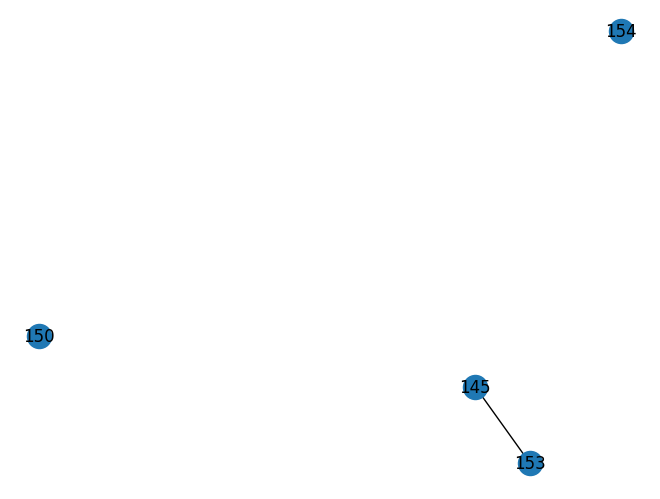

Performing node features query
Done with edge_df: 0.0005855560302734375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000035                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  145  153     26.01   36.660981               0.437564   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000035                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


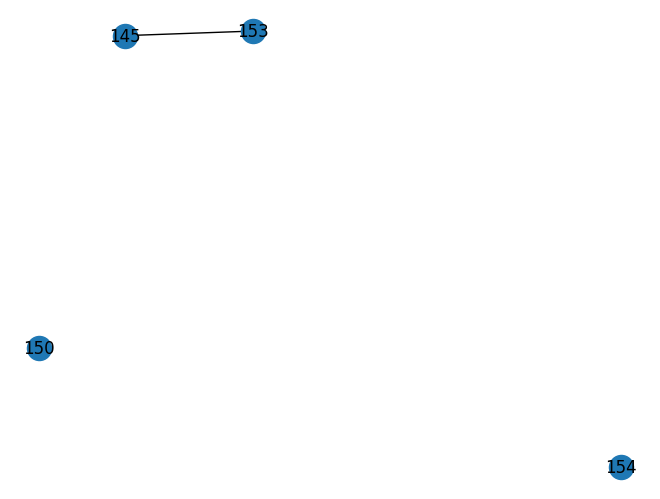

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1490.1516303059093 but max skip distance was 1490.1516303059093
Current node skip distance was 2004.6812218672449 but max skip distance was 2300.0
Current node skip distance was 1473.3884238935816 but max skip distance was 1473.3884238935816
Current node skip distance was 1688.7729390052598 but max skip distance was 1688.7729390052598
Current node skip distance was 1659.4288118933544 but max skip distance was 1859.441345211907
Current node skip distance was 1471.5851631431447 but max skip distance was 1507.6521660753895
Current node skip distance was 1537.8446294301966 but max skip distance was 1908.846359662374
Current node skip distance was 1693.3042837882767 but max skip distance was 1693.3042837882767
Current node skip distance was 1908.846359662374 but max skip distance was 1908.846359662374
Current node skip distance was 1497.4728475641812 but max skip distance 

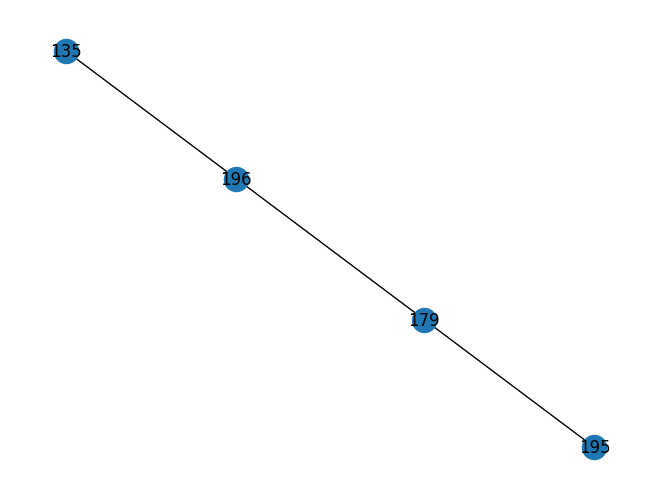

Performing global features query
Done with edge_df: 0.0006122589111328125
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   
2  196  179     64.03   12.284254               0.163567   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   
2              0.000000                0                       True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   

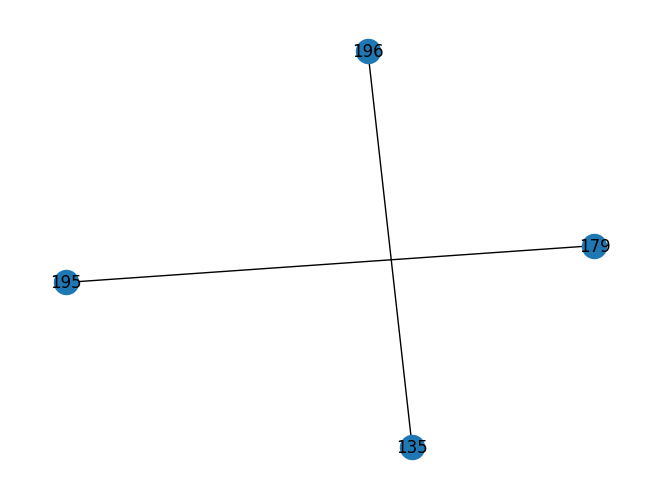

Performing node features query
Done with edge_df: 0.000762939453125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000079                2                      False   
1              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  135  196     13.72    4.055824               0.069021   
1  195  179     46.49   13.397045               0.178384   

   synapse_density_diff  n_synapses_diff def

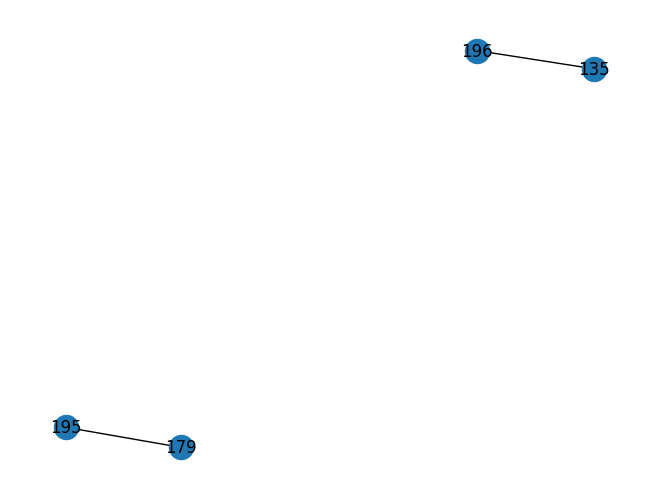

for upstream node 179, winning_node = 195, error_branches = [135 196]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (88.49933586232837) less than width_min(250)
Current node skip distance was 1469.3026492194927 but max skip distance was 1669.15941494473
Current node skip distance was 1928.8039005326134 but max skip distance was 1960.9148168013344
Current node skip distance was 2257.6813946666816 but max skip distance was 2257.6813946666816
Current node skip distance was 1578.5283299736464 but max skip distance was 1578.5283299736464
Current node skip distance was 1475.5326438941484 but max skip distance was 1475.5326438941484
Current node skip distance was 1435.7503089812697 but max skip distance was 1435.7503089812697
Current node skip distance was 1534.3086373964634 but max skip distance was 2097.9311388933647
Current node skip distance was 1759.4129353208561 but max skip distance was 1759.4129353208561
Current node skip distance was 1471.4291591100111 but 

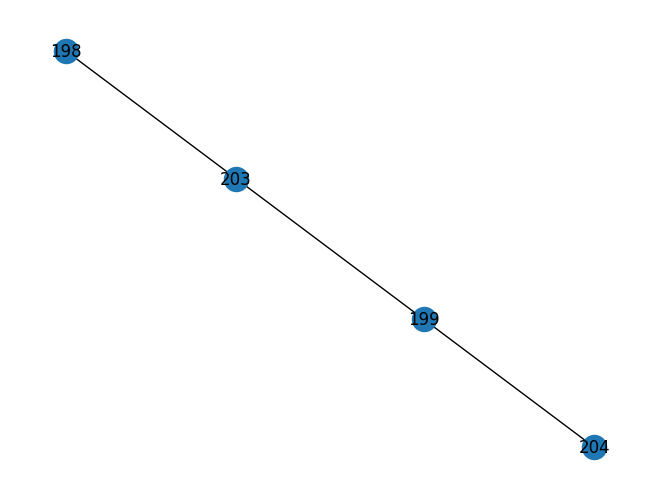

Performing global features query
Done with edge_df: 0.000888824462890625
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   33.807342               0.206595   
1  199  204     26.38   16.284658               0.196651   
2  199  203     59.48   80.831036               0.493954   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   
2              0.000144                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   33.807342               0.206595

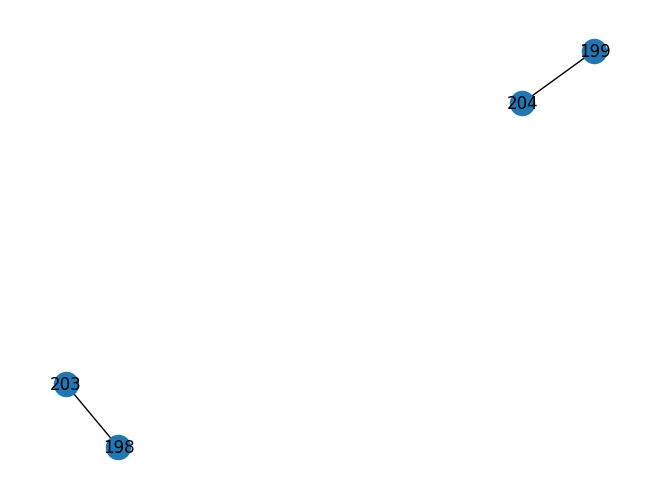

Performing node features query
Done with edge_df: 0.0006349086761474609
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   33.807342               0.206595   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000086                4                       False   
1              0.000175                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  198  203     19.08   33.807342               0.206595   
1  199  204     26.38   16.284658               0.196651   

   synapse_density_diff  n_synapses_d

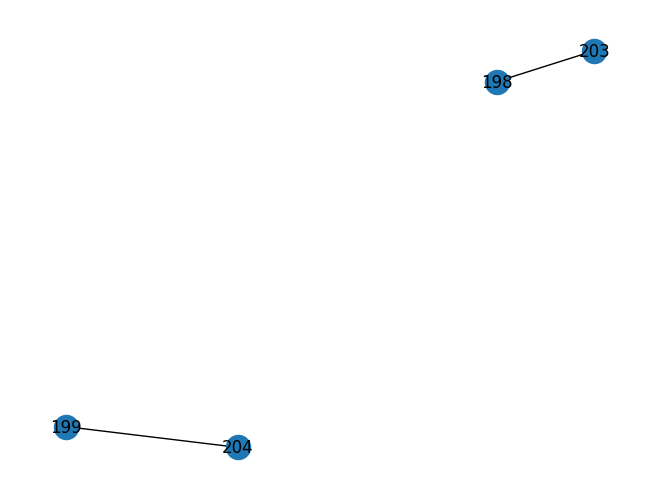

for upstream node 203, winning_node = 198, error_branches = [199 204]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (129.83350212845272) less than width_min(250)
Current node skip distance was 1443.854790039841 but max skip distance was 1443.854790039841
Current node skip distance was 1506.252005449707 but max skip distance was 2300.0
Current node skip distance was 1798.2531760095058 but max skip distance was 1798.2531760095058
Current node skip distance was 1536.1693446150296 but max skip distance was 1536.1693446150296
Current node skip distance was 1780.4587744781402 but max skip distance was 1780.4587744781402
Current node skip distance was 1590.876460916061 but max skip distance was 1590.876460916061
Current node skip distance was 1852.1825017965646 but max skip distance was 1936.009738559324
Current node skip distance was 2002.9322033042192 but max skip distance was 2002.9322033042192
Current node skip distance was 1737.2742171815642 but max skip distan

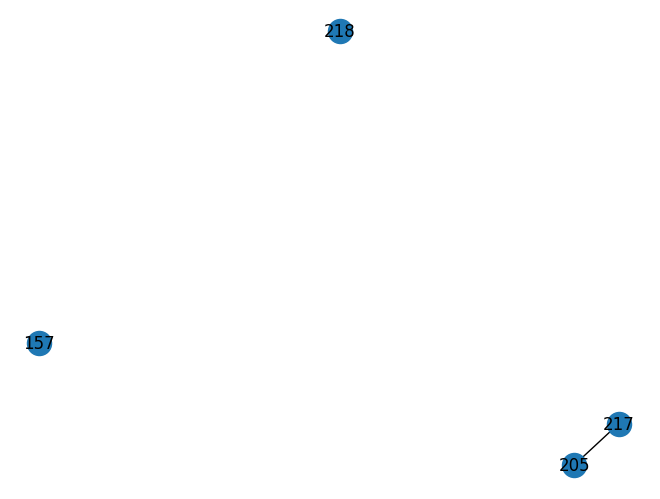

Performing global features query
Done with edge_df: 0.0008165836334228516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    7.082627               0.086903   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    7.082627               0.086903   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete  
0                          False  


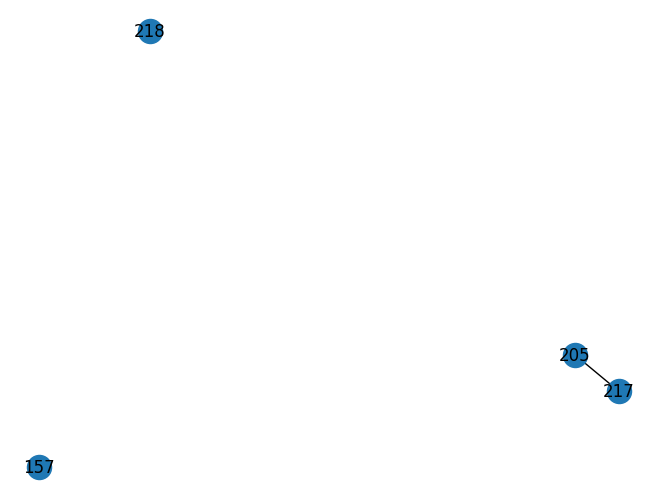

Performing node features query
Done with edge_df: 0.0008356571197509766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    7.082627               0.086903   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  205  217     18.15    7.082627               0.086903   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000133                1                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


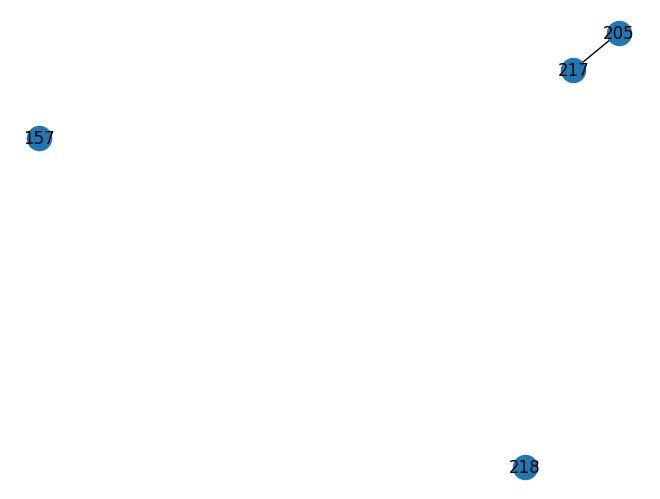

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1769.1048668204248 but max skip distance was 1848.5035166199302
Current node skip distance was 1662.4847643852409 but max skip distance was 2212.423557991369
Current node skip distance was 1892.906946060708 but max skip distance was 2117.333195363991
Current node skip distance was 1800.4908031559103 but max skip distance was 1800.4908031559103
Current node skip distance was 1833.6187435947909 but max skip distance was 1833.6187435947909
Current node skip distance was 1480.8555465104162 but max skip distance was 1833.6187435947909
Current node skip distance was 1739.262976609458 but max skip distance was 1830.9796473087345
Current node skip distance was 1483.2831497366271 but max skip distance was 1739.262976609458
Current node skip distance was 1583.7406157354194 but max skip distance was 1583.7406157354194
Current node skip distance was 1852.0032845489072 but max ski

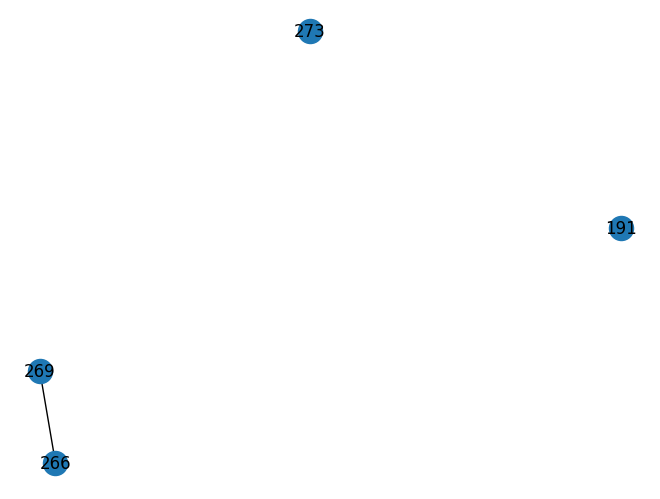

Performing global features query
Done with edge_df: 0.0006763935089111328
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete  
0                          None  


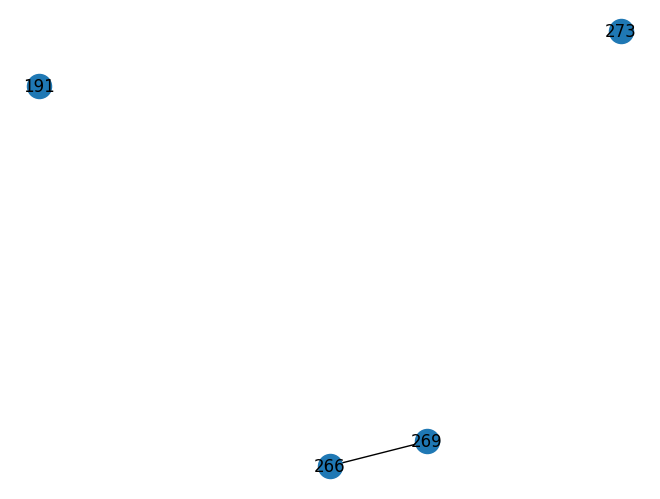

Performing node features query
Done with edge_df: 0.0008156299591064453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  266  269     17.25   14.812471               0.156971   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000194                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


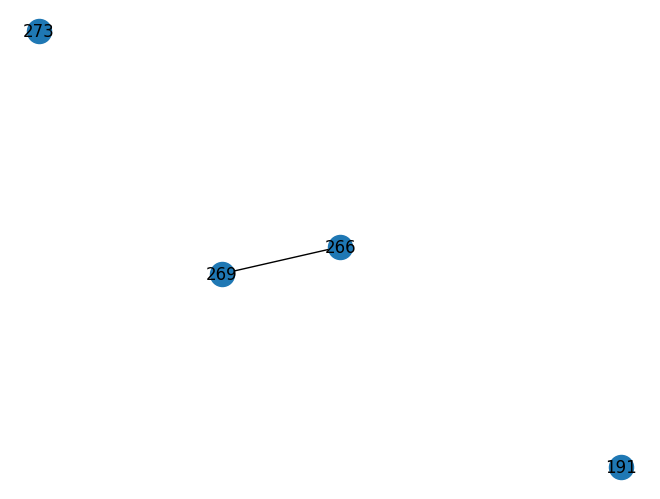

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2086.708888809626 but max skip distance was 2165.6546601796394
Current node skip distance was 2075.894362526472 but max skip distance was 2075.894362526472
Current node skip distance was 2165.6546601796394 but max skip distance was 2165.6546601796394
Current node skip distance was 1864.25330271235 but max skip distance was 1979.3255921928808
Current node skip distance was 1971.1845264032954 but max skip distance was 1971.1845264032954
Current node skip distance was 1711.0586477280299 but max skip distance was 2264.6276715987738
Current node skip distance was 1624.5953696971983 but max skip distance was 1873.2096968581504
Current node skip distance was 1978.2811473955007 but max skip distance was 2024.380261078134
Current node skip distance was 2298.921030871111 but max skip distance was 2298.921030871111
Current node skip distance was 1422.8191216850398 but max skip d

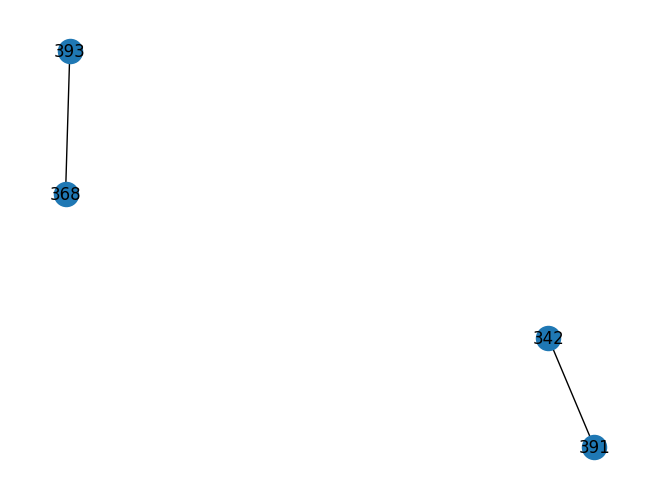

Performing global features query
Done with edge_df: 0.0006480216979980469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056      

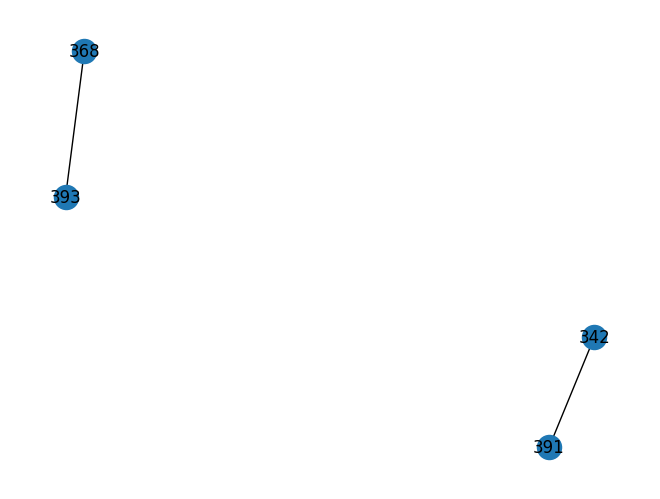

Performing node features query
Done with edge_df: 0.0006363391876220703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000056                1                      False   
1              0.000431                2                       None   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  368  393     16.07   10.782511               0.135372   
1  391  342     49.45   15.712201               0.094593   

   synapse_density_diff  n_synapses_d

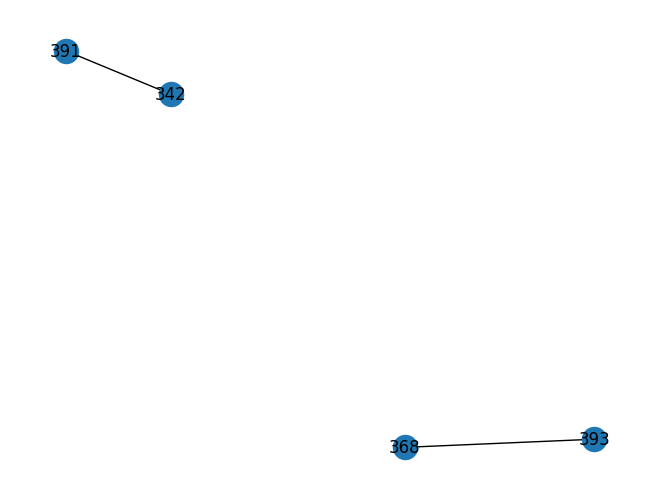

for upstream node 342, winning_node = 391, error_branches = [368 393]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (181.81578649690547) less than width_min(250)
Current node skip distance was 1857.9482625419403 but max skip distance was 1857.9482625419403
Current node skip distance was 2047.5565433018355 but max skip distance was 2047.5565433018355
Current node skip distance was 1723.0631465697677 but max skip distance was 2060.1060158328014
Current node skip distance was 1930.8859310455473 but max skip distance was 2226.881251855768
Current node skip distance was 1970.0153273419096 but max skip distance was 1970.0153273419096
Current node skip distance was 1820.6045623023558 but max skip distance was 1930.8859310455473
Current node skip distance was 2000.0150089779318 but max skip distance was 2296.284725981935
Current node skip distance was 1517.477557849377 but max skip distance was 2081.8828126758244
branch_match_query = :
(((width_diff < 75) or (width_d

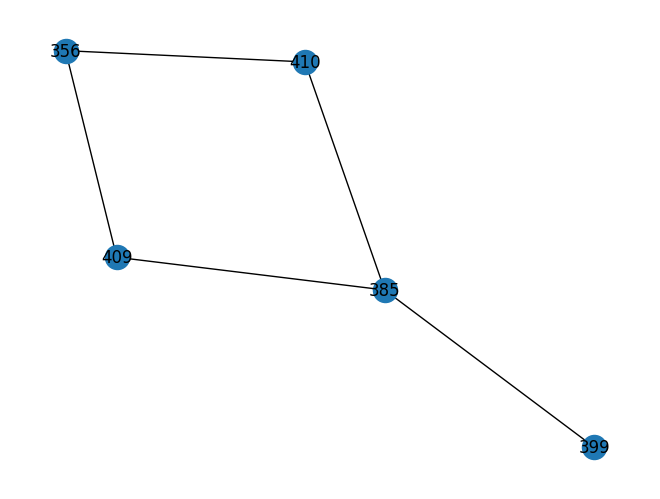

Performing global features query
Done with edge_df: 0.0008549690246582031
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   17.358979               0.276726   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    4.105859               0.048766   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_pa

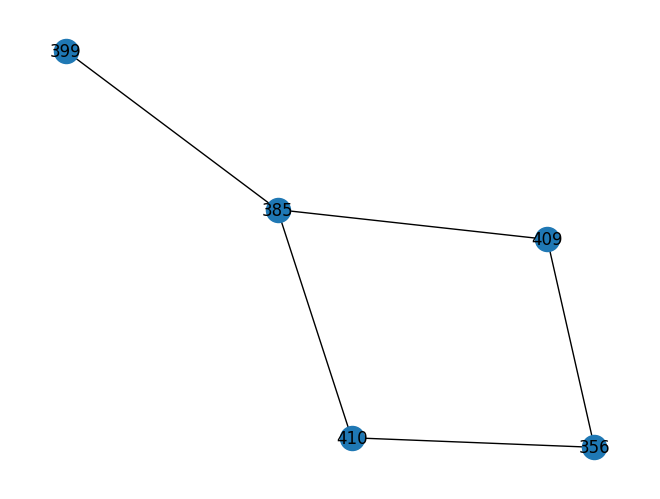

Performing node features query
Done with edge_df: 0.0009908676147460938
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  385  399     58.13   13.603553               0.216860   
1  385  409     30.64    0.065958               0.001051   
2  385  410     41.34   17.358979               0.276726   
3  409  356      8.45   21.530796               0.255727   
4  410  356     23.90    4.105859               0.048766   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000114                2                       None   
1              0.000153                3                       None   
2              0.000010                1                       None   
3              0.000137                3                       None   
4              0.000027                1                       None   

  definite_partne

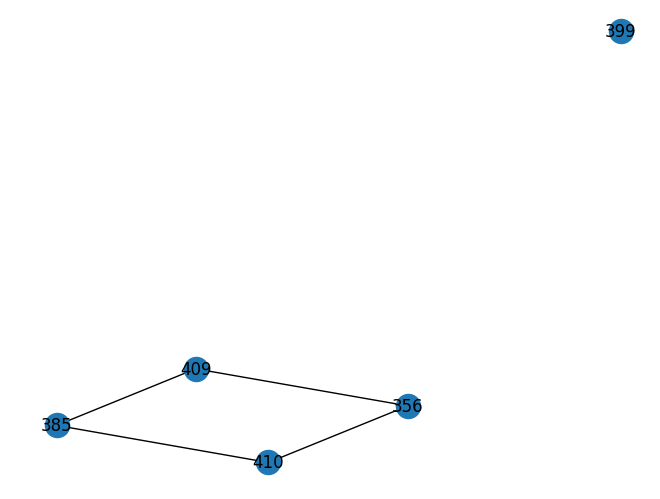

for upstream node 356, winning_node = None, error_branches = [385 399 409 410]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1407.3330603543238 but max skip distance was 1407.3330603543238
Current node skip distance was 1897.2302923052882 but max skip distance was 1897.2302923052882
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1675.3071071150648 but max skip distance was 1675.3071071150648
Current node skip distance was 1791.170407213397 but max skip distance was 2300.0
Current node skip distance was 1430.0452955758667 but max skip distance was 1430.0452955758667
Current node skip distance was 1453.4280808679287 but max skip distance was 1453.4280808679287
Current node skip distance was 1475.9217580922184 but max skip distance was 2300.0
Current node skip distance was 1873.8585886753744 but max skip distance was 1873.8585886753744
Current node skip distance w

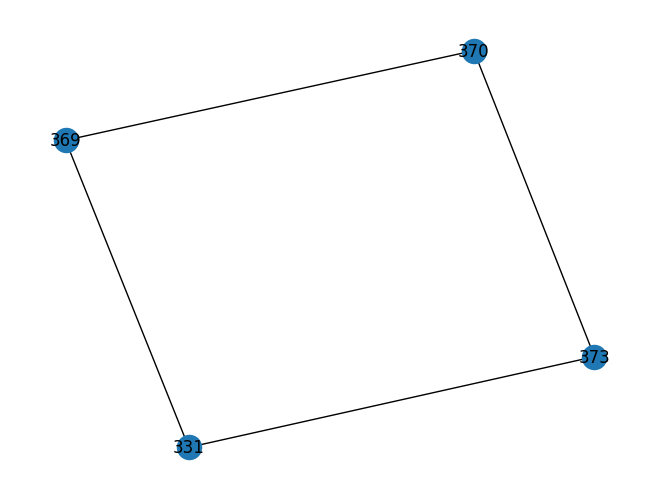

Performing global features query
Done with edge_df: 0.0006334781646728516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    8.211357               0.075570   
2  370  373     38.61   17.519293               0.183854   
3  370  369     24.06   13.370022               0.123045   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

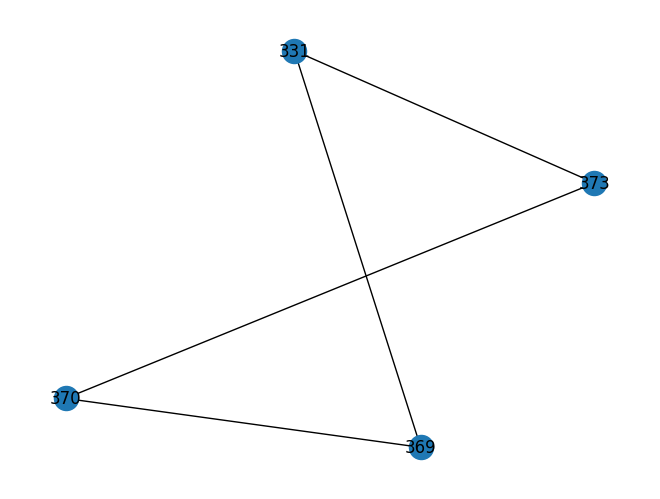

Performing node features query
Done with edge_df: 0.0006821155548095703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  331  373     24.18   22.677958               0.225768   
1  331  369     27.75    8.211357               0.075570   
2  370  373     38.61   17.519293               0.183854   
3  370  369     24.06   13.370022               0.123045   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000015                1                       None   
1              0.000140                0                       None   
2              0.000062                1                       None   
3              0.000093                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

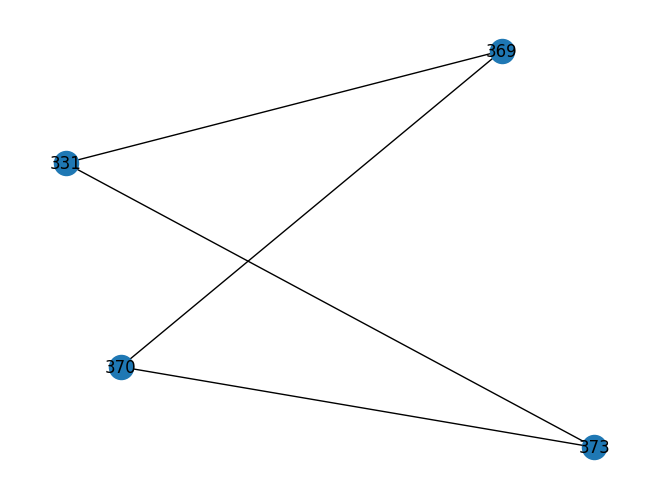

for upstream node 369, winning_node = None, error_branches = [331 370 373]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1885.8130669928205 but max skip distance was 1885.8130669928205
Current node skip distance was 1745.988538994956 but max skip distance was 1745.988538994956
Current node skip distance was 1490.708038892068 but max skip distance was 1499.7325270056906
Current node skip distance was 1517.6039942649368 but max skip distance was 1745.988538994956
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008118152618408203
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  336     85.72   51.534328               0.663692   
1  332  372     

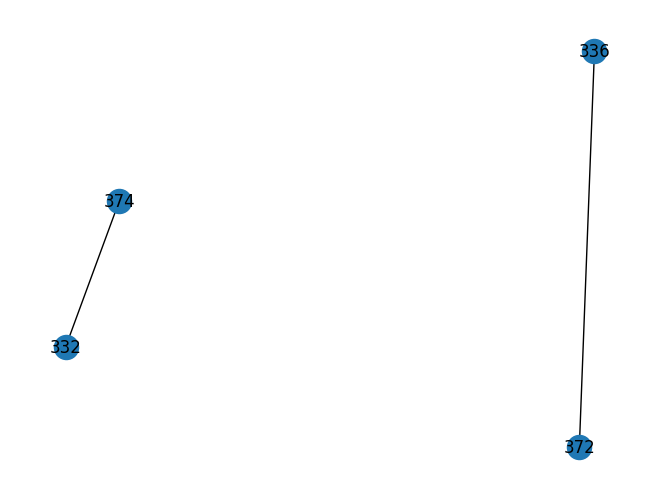

Performing global features query
Done with edge_df: 0.0007863044738769531
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

   definite_partner_width_delete  
0                          False  
1                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097  

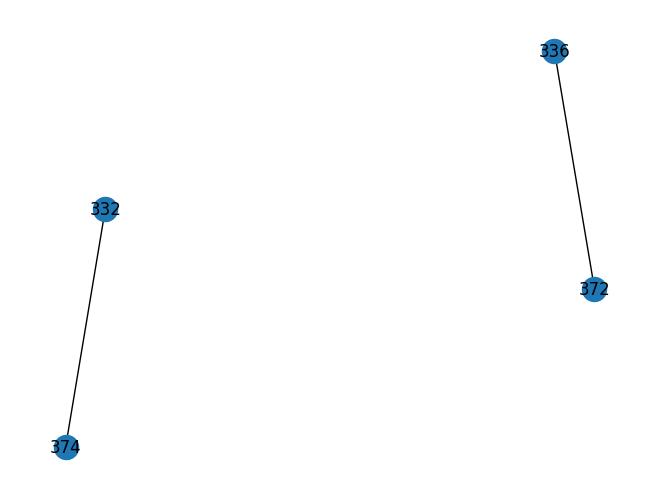

Performing node features query
Done with edge_df: 0.0007543563842773438
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000097                1                       False   
1              0.000130               10                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
1                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  332  374     11.24    6.576993               0.078088   
1  336  372     36.23    9.854956               0.076287   

   synapse_density_diff  n_synapse

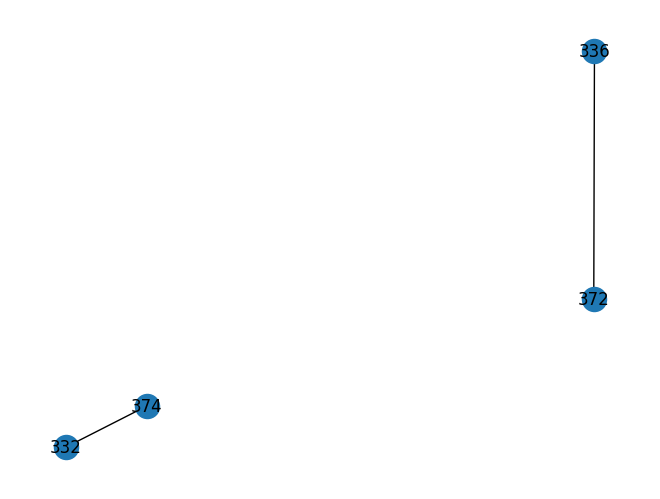

for upstream node 374, winning_node = 332, error_branches = [336 372]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (77.64796574259381) less than width_min(250)
Current node skip distance was 1824.259398723258 but max skip distance was 2221.475821813151
Current node skip distance was 2045.7593757531026 but max skip distance was 2045.7593757531026
Current node skip distance was 1932.4387404207182 but max skip distance was 1932.4387404207182
Current node skip distance was 2024.3780371885134 but max skip distance was 2024.3780371885134
Current node skip distance was 1992.5090733484935 but max skip distance was 2300.0
Current node skip distance was 1525.3506950240187 but max skip distance was 1586.8865547087983
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008566379547119141
Performing Edge Query
After edge filter, # of rows = 3
E

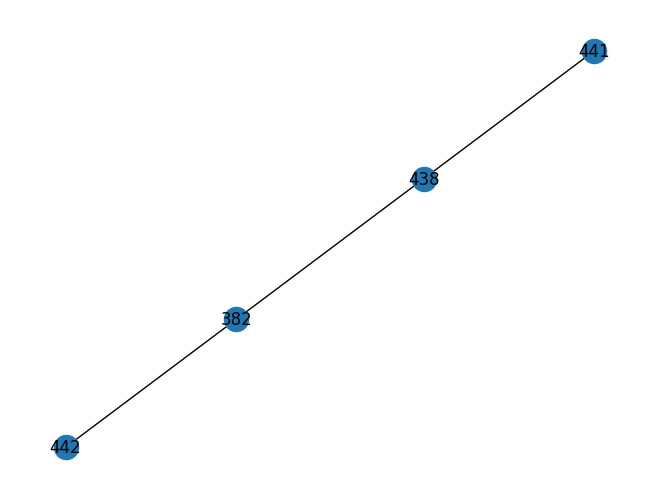

Performing global features query
Done with edge_df: 0.0007138252258300781
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.805461               0.176125   
1  438  382     46.16   19.055325               0.221357   
2  442  382     25.40   14.768606               0.171560   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000004                1                       True   
2              0.000049                3                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.805461               0.176125   

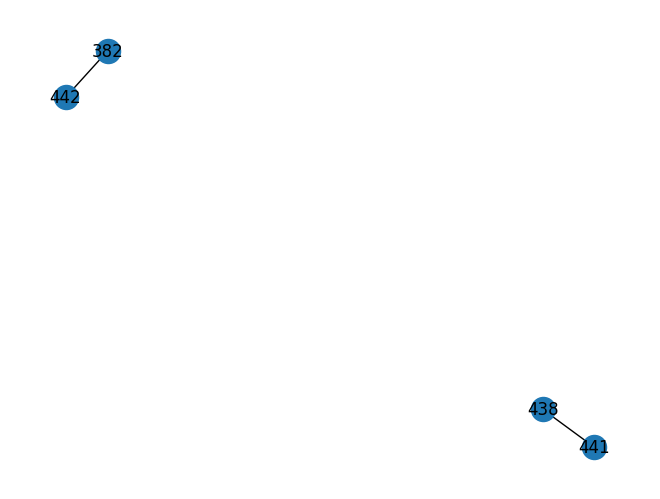

Performing node features query
Done with edge_df: 0.0006046295166015625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.805461               0.176125   
1  442  382     25.40   14.768606               0.171560   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000070                3                      False   
1              0.000049                3                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  438  441      2.74   11.805461               0.176125   
1  442  382     25.40   14.768606               0.171560   

   synapse_density_diff  n_synapses_diff

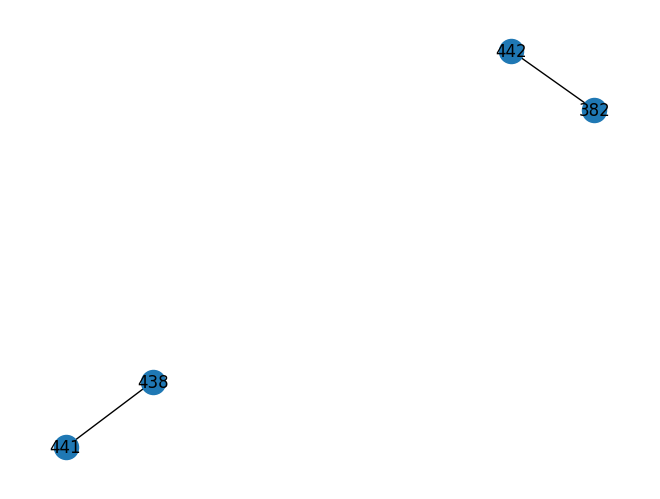

for upstream node 382, winning_node = 442, error_branches = [438 441]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (116.1121258385822) less than width_min(250)
Current node skip distance was 1491.6337593313776 but max skip distance was 1491.6337593313776
Current node skip distance was 1499.7325270056906 but max skip distance was 1499.7325270056906
Current node skip distance was 1428.0407321066473 but max skip distance was 1428.0407321066473
Current node skip distance was 1983.3865421239625 but max skip distance was 1983.3865421239625
Current node skip distance was 1906.784317756396 but max skip distance was 1906.784317756396
Current node skip distance was 1535.5603845695848 but max skip distance was 1535.5603845695848
Current node skip distance was 1924.2324437371053 but max skip distance was 1924.2324437371053
Current node skip distance was 1489.5075320461283 but max skip distance was 2227.710246601997
Current node skip distance was 1453.6175721877003 but m

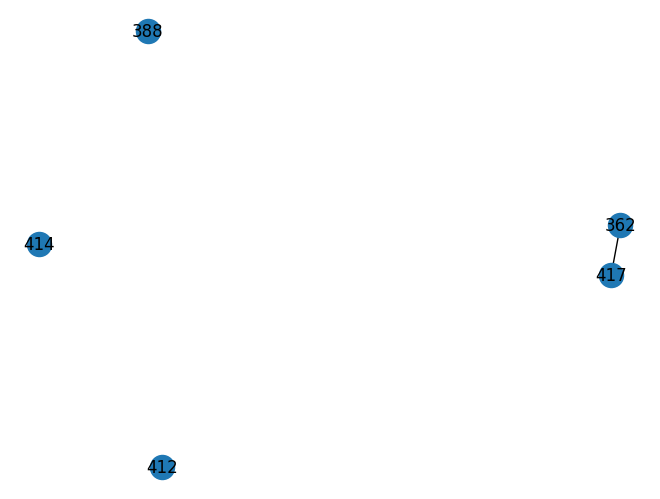

Performing global features query
Done with edge_df: 0.0006000995635986328
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete  
0                          None  


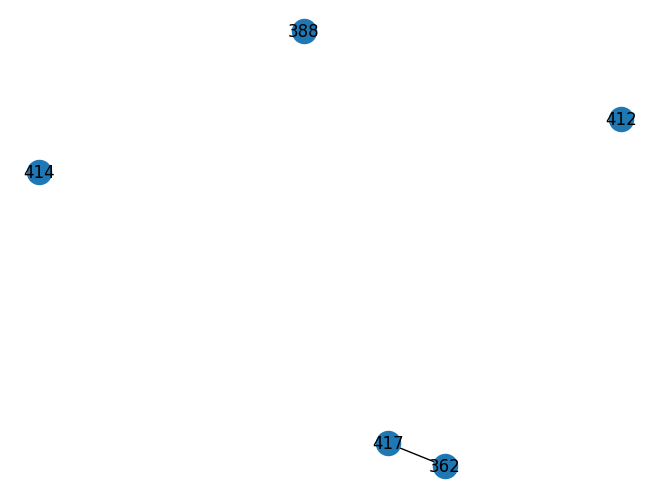

Performing node features query
Done with edge_df: 0.0020508766174316406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


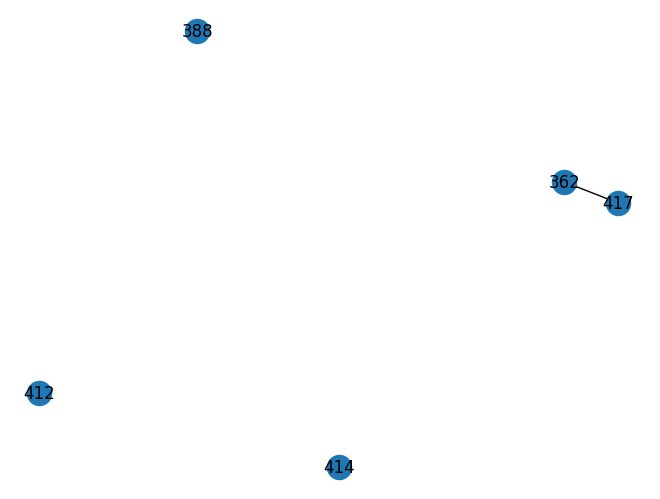

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1385.805465003882 but max skip distance was 1493.7677241238655
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009348392486572266
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  414    106.83    4.280608               0.067719   
1  362  417      2.53   15.293383               0.241942   
2  362  413    121.33   10.617559               0.201880   
3  414  417     75.61   19.573991               0.332155   
4  414  413    106.02    6.336951               0.120490   
5  417  413     58.41   25.910942               0.492666   

   synapse_density_diff  n_synapses_diff  
0              0.000068      

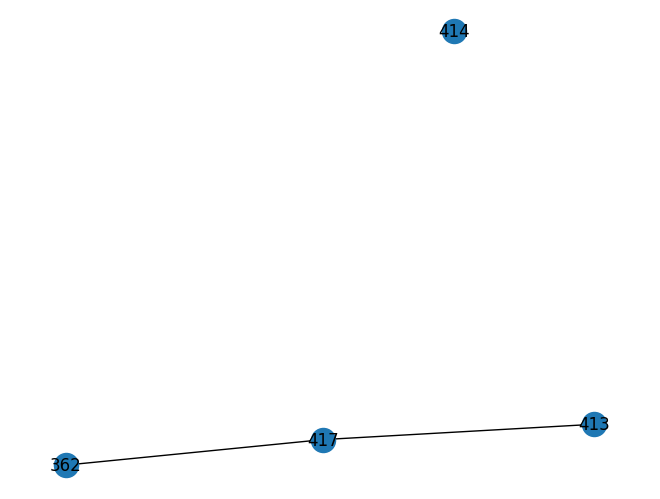

Performing global features query
Done with edge_df: 0.0008022785186767578
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   
1  417  413     58.41   25.910942               0.492666   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   
1              0.000051                1                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_part

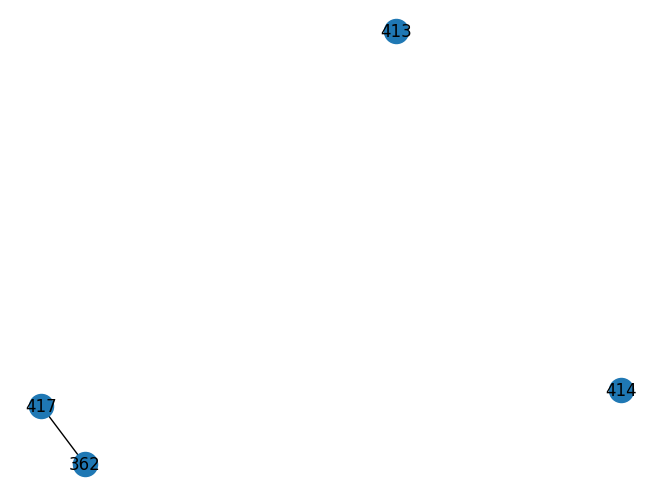

Performing node features query
Done with edge_df: 0.0008192062377929688
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  362  417      2.53   15.293383               0.241942   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000063                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


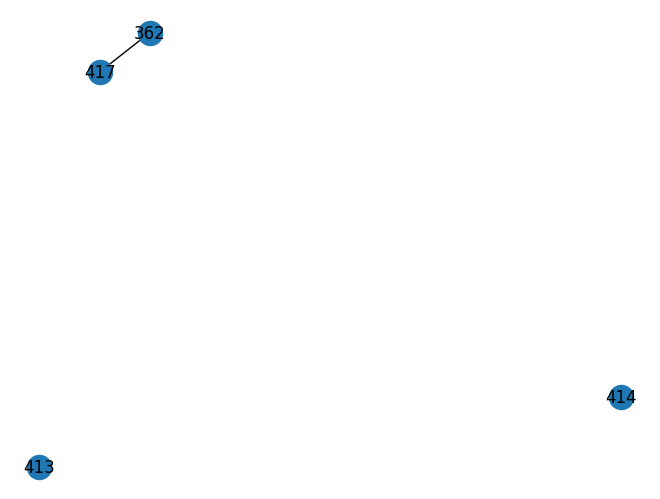

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1412.2094292764027 but max skip distance was 1639.4577799149956
Current node skip distance was 2019.0862723530136 but max skip distance was 2256.055276366722
Current node skip distance was 1493.7677241238655 but max skip distance was 1493.7677241238655
Current node skip distance was 1922.9562432247455 but max skip distance was 1981.6205697749267
Current node skip distance was 1797.726209129479 but max skip distance was 2222.579722388221
Current node skip distance was 1623.3778030562128 but max skip distance was 1922.9562432247455
Current node skip distance was 1926.6004499342048 but max skip distance was 2019.0862723530136
Current node skip distance was 1543.0186166671774 but max skip distance was 1543.0186166671774
Current node skip distance was 1424.7536385843455 but max skip distance was 1424.7536385843455
Current node skip distance was 1892.3149310140766 but max s

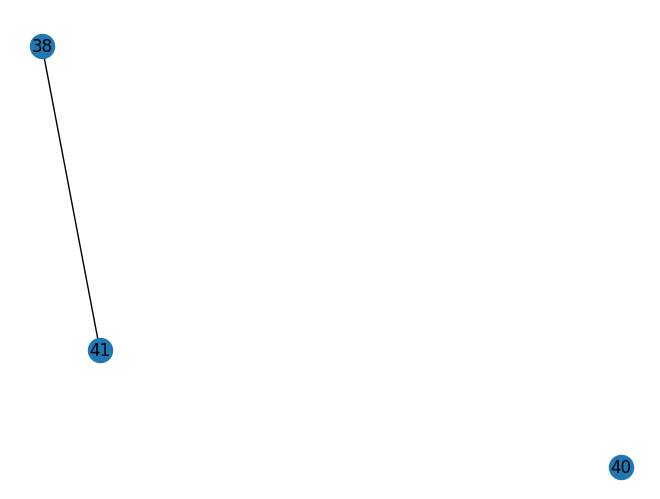

Performing global features query
Done with edge_df: 0.0007183551788330078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  41  38     28.73   14.693078               0.179967              0.000197   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                1                       False                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  41  38     28.73   14.693078               0.179967              0.000197   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                1                       False                          None  


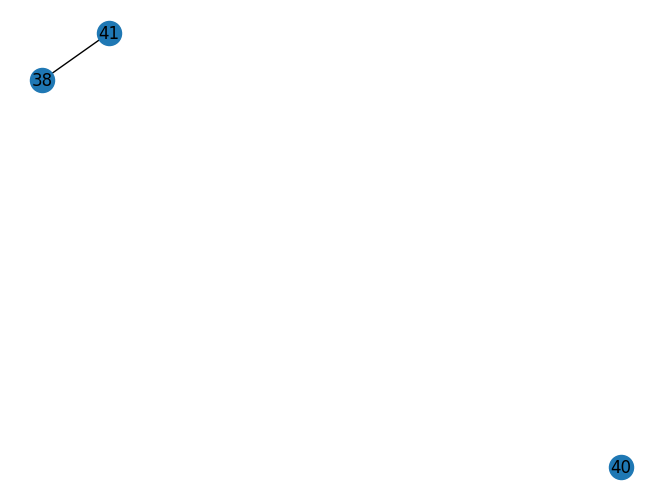

for upstream node 38, winning_node = 41, error_branches = [40]
38 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0020797252655029297
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.742755               0.237354   
1  124  128     13.82   34.061806               0.433310   
2  125  128    149.36    7.319051               0.093108   

   synapse_density_diff  n_synapses_diff  
0              0.000029                3  
1              0.000213                4  
2              0.000242                1  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.742755               0.237354   
1  124  128     13.8

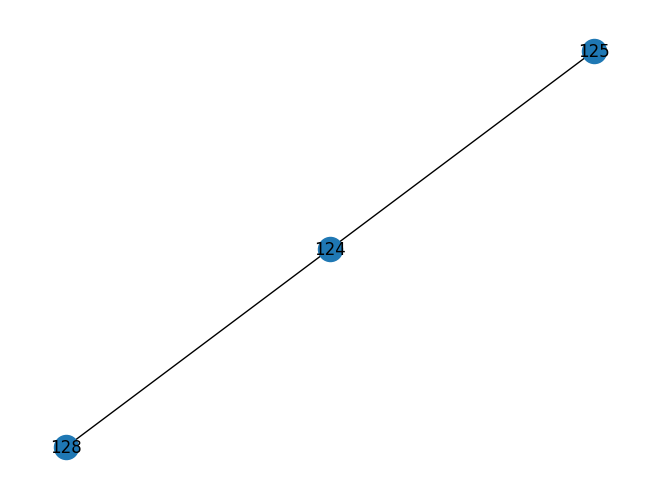

Performing global features query
Done with edge_df: 0.0006060600280761719
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.742755               0.237354   
1  124  128     13.82   34.061806               0.433310   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                3                       None   
1              0.000213                4                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  124  125     37.32   26.742755               0.237354   
1  124  128     13.82   34.061806               0.433310   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029         

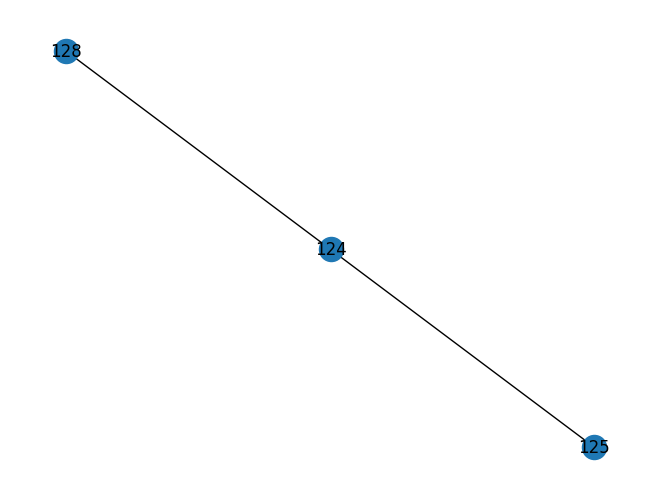

for upstream node 128, winning_node = None, error_branches = [124 125]
128 triggered axon_double_back_inh_filter
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016989707946777344
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  243  252     17.50   22.575078               0.207760   
1  243  224    146.30   57.248338               0.345062   
2  252  224     47.35   79.823416               0.481132   

   synapse_density_diff  n_synapses_diff  
0              0.000089                3  
1              0.000387                5  
2              0.000476                2  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  243  252     17.50   22.575078               0.207760   
1  252  224

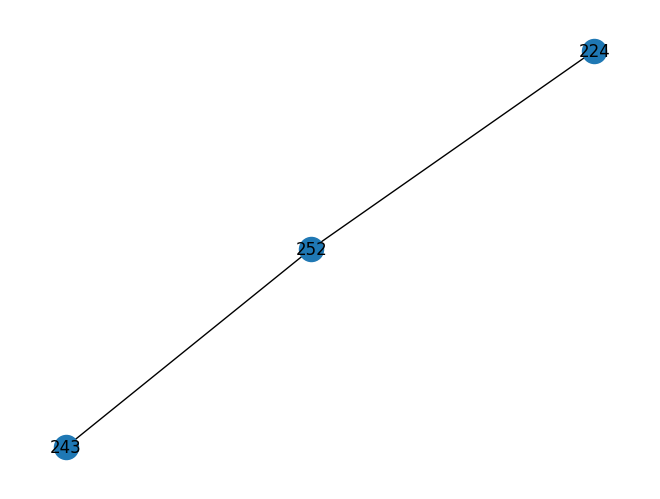

Performing global features query
Done with edge_df: 0.0005986690521240234
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  243  252     17.50   22.575078               0.207760   
1  252  224     47.35   79.823416               0.481132   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   
1              0.000476                2                        True   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  243  252      17.5   22.575078                0.20776   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000089                3                       False   

  definite_part

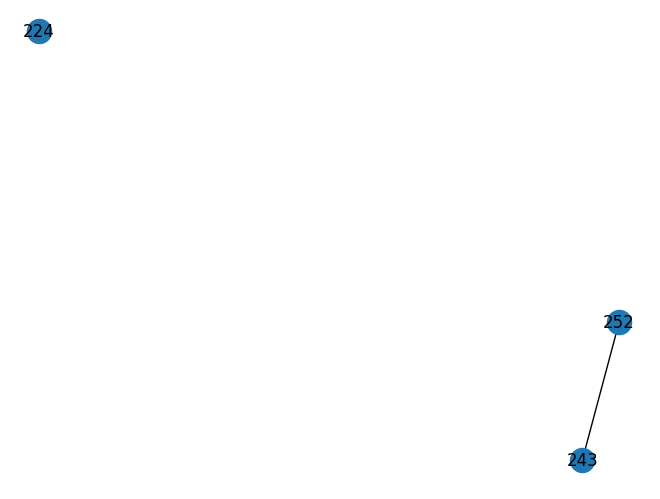

224 triggered axon_double_back_inh_filter
limb_branch_dict_to_cancel = {'L0': array([258, 294, 295, 296, 297, 244, 214, 255, 111, 130, 131, 103, 109,
       110, 113, 114, 116, 117, 120, 121, 123, 115, 118,  40, 124, 125,
       243, 252])}
width_max = 500
upstream_width_max = 500
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
N_branches on limbs before simplification
L0: 273
L1: 14
L2: 15
L3: 13
L4: 11
L5: 5
L6: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 273 (difference of 0)
L1: 14 (difference of 0)
L2: 15 (difference of 0)
L3: 13 (difference of 0)
L4: 11 (difference of 0)
L5: 5 (difference of 0)
L6: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----



---N_branches on limbs AFTER combine_path_branches---
L0: 268 (difference of 5)
L1: 13 (difference of 1)
L2: 15 (difference of 0)
L3: 13 (difference of 0)
L4: 11 

In [51]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [58]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

No skeletons to stack so returning empty list
No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 11.26, 'soma_angle_min': 11.26}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 6, 'soma_angle_max': 154.87, 'soma_angle_min': 25.04}


# Saving off the autoproofread neuron

In [60]:
neuron_obj_proof.neuron_graph_after_proof

In [59]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.30456995964050293
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.5174260139465332
Total time for limb_meshes compression = 1.7295825481414795
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 54.71129512786865
Cleared mesh: <trimesh.Trimesh(vertices.shape=(526, 3), faces.shape=(1166, 3))>:140104082397024
Cleared mesh: <trimesh.Trimesh(vertices.shape=(19286, 3), faces.shape=(38352, 3))>:140104082397168
Total time for compression = 133.7932631969452


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Inh/864691135567721964_auto_proof---


'864691135567721964_auto_proof.pbz2'

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from python_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [56]:
nviz.plot_compartments(neuron_obj_proof)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

apical:blue
apical_shaft:aqua
apical_tuft:purple
basal:yellow
axon:red
oblique:green


Unlabeled: transparent green
